In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# see all the csv files in the directory
import os
files = os.listdir("company")


In [6]:
# required_file = files[8]
# 'TSHL', 'IGI', 'LEC', 'MLBL', 'SRLI', 'HDL', 'GFCL', 'CITY'
required_file = 'GFCL.csv'

In [7]:
df = pd.read_csv(f'company/{required_file}')
data = df.copy()

In [8]:
df.head()

,SN,Date,LTP,%change,High,Low,Open,Qty.,Turnover
0,1,2025/04/17,679.49,1.38,683.50,666.00,680.00,"24,755","16,736,019.50"
1,2,2025/04/16,670.26,-1.21,680.00,668.40,680.00,"10,581","7,110,607.40"
2,3,2025/04/15,678.48,2.97,700.00,660.00,670.00,"31,114","21,130,077.40"
3,4,2025/04/13,658.90,-0.51,675.00,655.20,655.20,"15,436","10,209,578.20"
4,5,2025/04/10,662.27,0.15,683.90,660.00,674.50,"12,415","8,248,432.10"


In [9]:
# remove the comlun with name
df = df.drop(['SN'], axis=1)




In [10]:
# check the data type
df.dtypes

Date         object
LTP          object
%change     float64
High         object
Low          object
Open         object
Qty.         object
Turnover     object
dtype: object

In [11]:
# make the qty and turnover to float
df['Qty.'] = df['Qty.'].replace(',','', regex=True).astype(float)
df['Turnover'] = df['Turnover'].replace(',','', regex=True).astype(float)
df['LTP'] = df['LTP'].replace(',','', regex=True).astype(float)
df['Open'] = df['Open'].replace(',','', regex=True).astype(float)
df['High'] = df['High'].replace(',','', regex=True).astype(float)
df['Low'] = df['Low'].replace(',','', regex=True).astype(float)
df['Qty.'], df['Turnover']

(0       24755.0
 1       10581.0
 2       31114.0
 3       15436.0
 4       12415.0
          ...   
 2076       40.0
 2077      249.0
 2078     4030.0
 2079     3871.0
 2080      833.0
 Name: Qty., Length: 2081, dtype: float64,
 0       16736019.5
 1        7110607.4
 2       21130077.4
 3       10209578.2
 4        8248432.1
            ...    
 2076       10680.0
 2077       10680.0
 2078       10680.0
 2079       10680.0
 2080       10680.0
 Name: Turnover, Length: 2081, dtype: float64)

In [12]:
df.dtypes

Date         object
LTP         float64
%change     float64
High        float64
Low         float64
Open        float64
Qty.        float64
Turnover    float64
dtype: object

In [13]:
df.head()

,Date,LTP,%change,High,Low,Open,Qty.,Turnover
0,2025/04/17,679.49,1.38,683.5,666.0,680.0,24755.0,16736019.5
1,2025/04/16,670.26,-1.21,680.0,668.4,680.0,10581.0,7110607.4
2,2025/04/15,678.48,2.97,700.0,660.0,670.0,31114.0,21130077.4
3,2025/04/13,658.90,-0.51,675.0,655.2,655.2,15436.0,10209578.2
4,2025/04/10,662.27,0.15,683.9,660.0,674.5,12415.0,8248432.1


In [14]:
df['Date'] = pd.to_datetime(df['Date'])

In [15]:
df['Date']

0      2025-04-17
1      2025-04-16
2      2025-04-15
3      2025-04-13
4      2025-04-10
          ...    
2076   2014-08-04
2077   2014-08-04
2078   2014-08-04
2079   2014-08-04
2080   2014-08-04
Name: Date, Length: 2081, dtype: datetime64[ns]

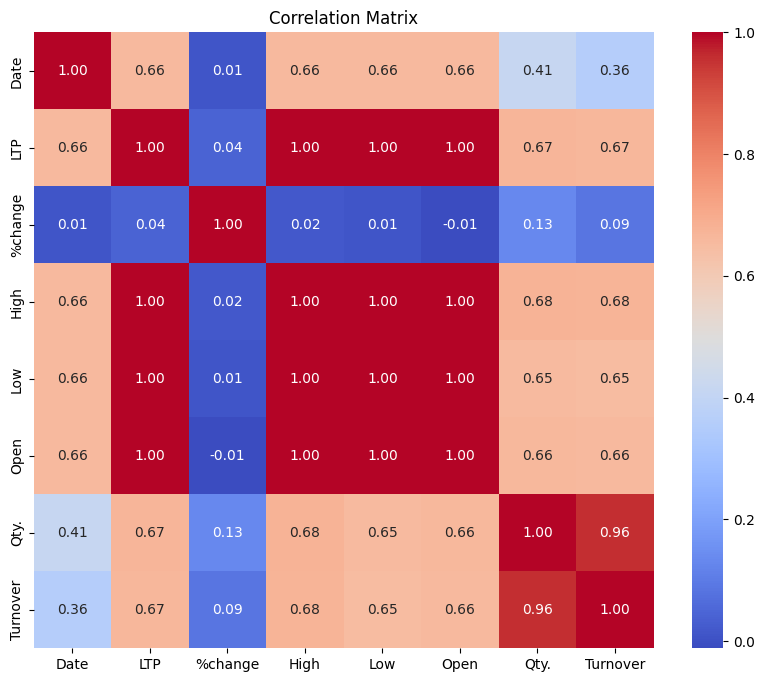

In [16]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

### Graph

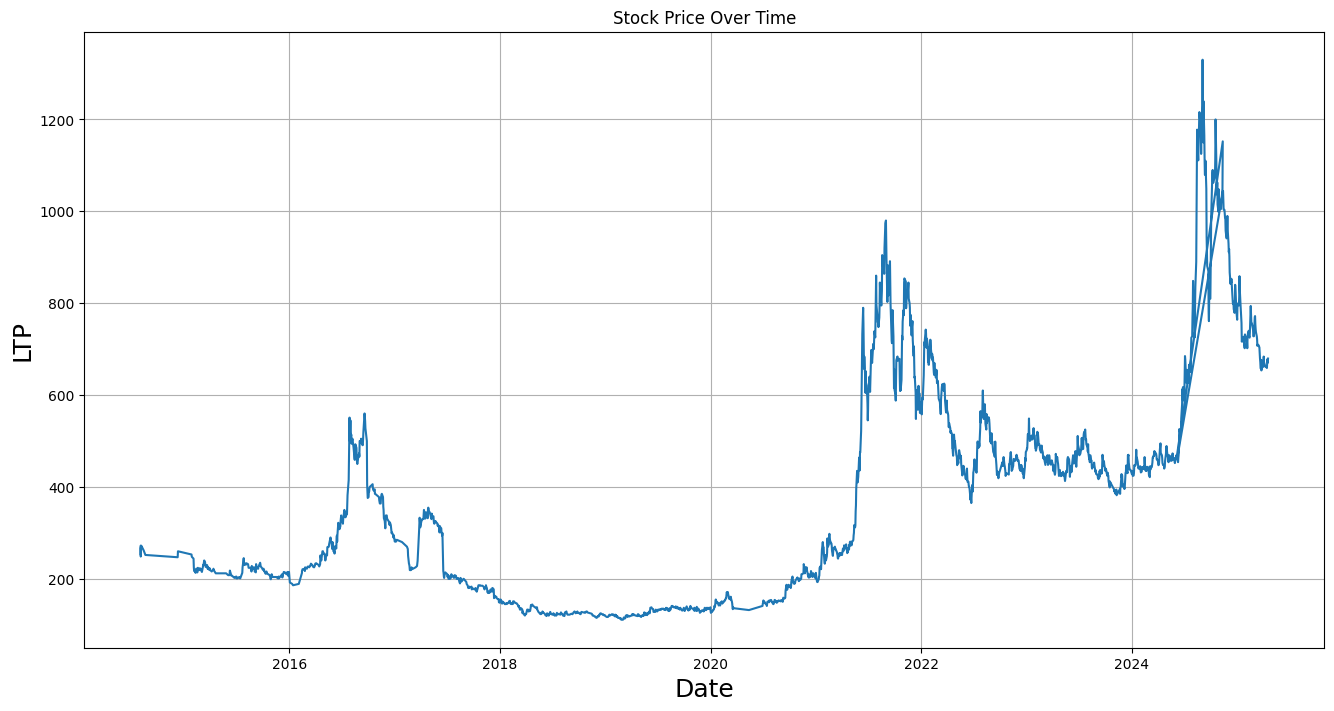

In [17]:
# Plotting "Date" against "LTP"-Last Trade Price
plt.figure(figsize=(16,8))
plt.title('Stock Price Over Time')
plt.xlabel('Date', fontsize=18)
plt.ylabel('LTP', fontsize=18)
plt.plot(df['Date'], df['LTP'])
# make grid lines
plt.grid(True)
plt.show()



In [18]:
df['%change']

0       1.38
1      -1.21
2       2.97
3      -0.51
4       0.15
        ... 
2076   -1.84
2077   -1.97
2078    9.24
2079    4.60
2080    1.60
Name: %change, Length: 2081, dtype: float64

In [19]:
df['Month'] = df['Date'].dt.month

In [20]:
df.groupby('Month').mean()

,Date,LTP,%change,High,Low,Open,Qty.,Turnover
Month,,,,,,,,
1,2021-05-28 08:17:46.666666752,387.559259,0.232160,397.036420,379.709877,387.477778,18499.234568,1.050635e+07
2,2020-09-14 12:28:28.474576384,353.716384,-0.060452,361.629944,347.976271,354.390395,11926.333333,6.414622e+06
3,2020-07-12 22:57:23.478260992,347.451522,-0.060652,353.081522,342.391304,348.050543,7343.157609,3.763201e+06
4,2020-09-02 18:13:40.253164544,341.551456,0.184557,347.829747,335.963924,341.736709,10491.354430,4.396217e+06
5,2020-06-03 10:46:09.230769152,314.173718,0.161474,319.582051,308.077564,313.782692,14378.929487,5.482795e+06
6,2020-04-05 22:44:39.069767424,354.133140,0.512674,362.607558,345.083140,353.504651,24923.604651,1.378599e+07
7,2020-04-24 23:53:00.582524160,367.443204,0.832476,375.484951,356.762136,364.265049,29625.703883,1.902134e+07
8,2020-03-23 08:59:04.615384576,419.766154,0.078974,431.659487,409.076410,419.401026,39720.800000,3.488981e+07
9,2020-06-22 05:25:25.423728896,427.816949,-0.347740,443.934463,417.185311,431.763842,30458.395480,2.821138e+07


In [21]:
monthly_change = df.groupby('Month').mean()['%change']
month_names = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
               7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
monthly_change.index = monthly_change.index.map(month_names)
monthly_change

Month
Jan    0.232160
Feb   -0.060452
Mar   -0.060652
Apr    0.184557
May    0.161474
Jun    0.512674
Jul    0.832476
Aug    0.078974
Sep   -0.347740
Oct    0.241014
Nov   -0.101656
Dec   -0.169344
Name: %change, dtype: float64

### Mean change Per Month

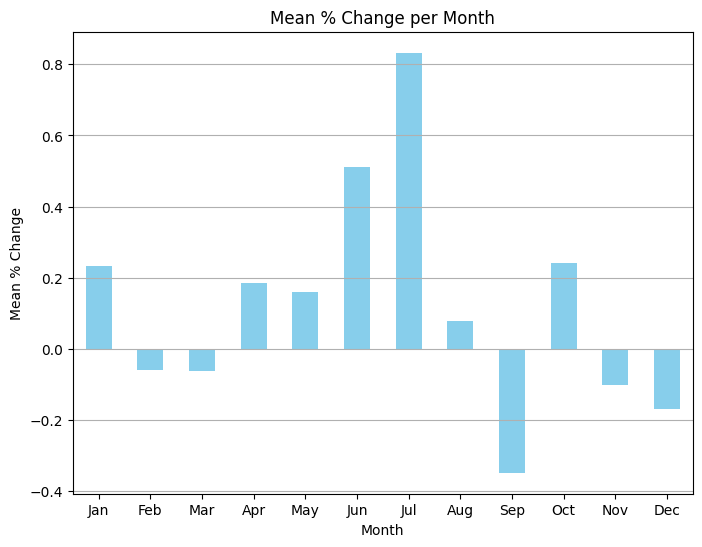

In [22]:
# Plotting month against the mean %change
plt.figure(figsize=(8, 6))
monthly_change.plot(kind='bar', color='skyblue')
plt.title('Mean % Change per Month')
plt.xlabel('Month')
plt.ylabel('Mean % Change')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


### Average Price per Year

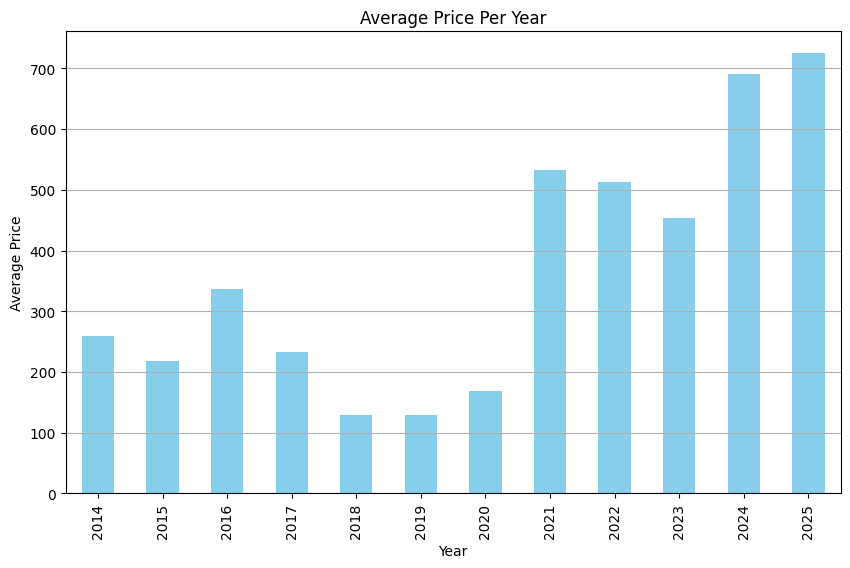

In [23]:
# Price average for each year
year = df['Date'].dt.year
average_price_per_year = df.groupby(year)['LTP'].mean()

# Plotting the bar diagram
plt.figure(figsize=(10, 6))
average_price_per_year.plot(kind='bar', color='skyblue')
plt.title('Average Price Per Year')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.grid(axis='y')
plt.show()


In [24]:
# Analyzing percentage change (%change)
df['Fluctuation'] = df['%change'].abs()  # Absolute value for fluctuations
threshold_fluctuation = 2.0  # Define your threshold for significant fluctuations
significant_fluctuations = df[df['Fluctuation'] > threshold_fluctuation]

In [25]:
df["Fluctuation"] = df['%change']
threshold_fluctuation = 2.0
significant_fluctuation = df[df['Fluctuation']> 2]
significant_fluctuations[['Date', '%change']]


,Date,%change
2,2025-04-15,2.97
9,2025-04-02,3.39
14,2025-03-25,-3.37
15,2025-03-24,2.90
16,2025-03-23,-3.39
...,...,...
2071,2014-12-11,5.26
2073,2014-08-20,-3.82
2074,2014-08-14,-3.68
2078,2014-08-04,9.24


In [26]:
print("Periods of significant fluctuations:")
print(significant_fluctuations[['Date', 'Fluctuation']].head(20))

Periods of significant fluctuations:
         Date  Fluctuation
2  2025-04-15         2.97
9  2025-04-02         3.39
14 2025-03-25         3.37
15 2025-03-24         2.90
16 2025-03-23         3.39
23 2025-03-11         2.02
28 2025-03-04         2.33
30 2025-03-02         5.77
36 2025-02-18         2.32
37 2025-02-17         2.14
38 2025-02-16         7.81
45 2025-02-05         3.40
50 2025-01-27         4.27
51 2025-01-26         2.09
57 2025-01-16         5.35
58 2025-01-15         2.84
60 2025-01-12         4.58
61 2025-01-09         3.35
62 2025-01-08         5.37
63 2025-01-07         2.52


In [27]:
data =df.copy()

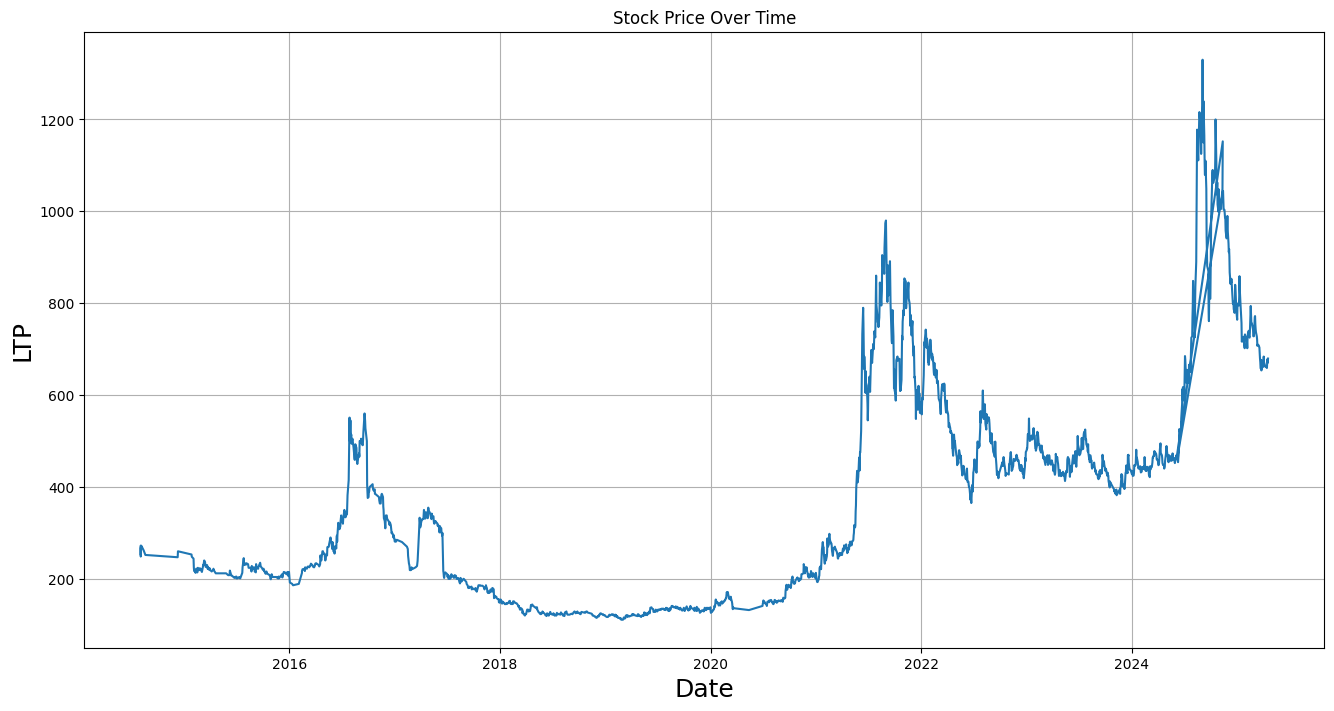

In [28]:
# Plotting "Date" against "LTP"-Last Trade Price
plt.figure(figsize=(16,8))
plt.title('Stock Price Over Time')
plt.xlabel('Date', fontsize=18)
plt.ylabel('LTP', fontsize=18)
plt.plot(df['Date'], df['LTP'])
# make grid lines
plt.grid(True)
plt.show()

In [29]:
df_given_year = data[data['Date'].dt.year >= 2022]


### Mean median, Mode, Deviation

In [30]:
mean = df_given_year['LTP'].mean()
median = df_given_year['LTP'].median()
mode = df_given_year['LTP'].mode()[0]
std = df_given_year['LTP'].std()
max_value = df_given_year['LTP'].max()
min_value = df_given_year['LTP'].min()
print("Maximum: ", max_value)
print("Minimum: ", min_value)
print("Mean: ", mean)
print("Median: ", median)
print("Mode: ", mode)
print("Standard Deviation: ", std)

Maximum:  1330.0
Minimum:  365.0
Mean:  567.1575612903225
Median:  475.3
Mode:  460.0
Standard Deviation:  188.0411035427212


Maximum price:  1330.0
Minimum price:  111.0
Mean price:  374.3590148966843
Median price:  322.0
Standard Deviation of price:  236.77350858151397
0    679.49
1    670.26
2    678.48
3    658.90
4    662.27
5    661.30
6    662.25
7    663.40
8    671.52
9    683.83
Name: LTP, dtype: float64


C:\Users\baral\AppData\Local\Temp\ipykernel_3776\2351986036.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['LTP'], color='skyblue')


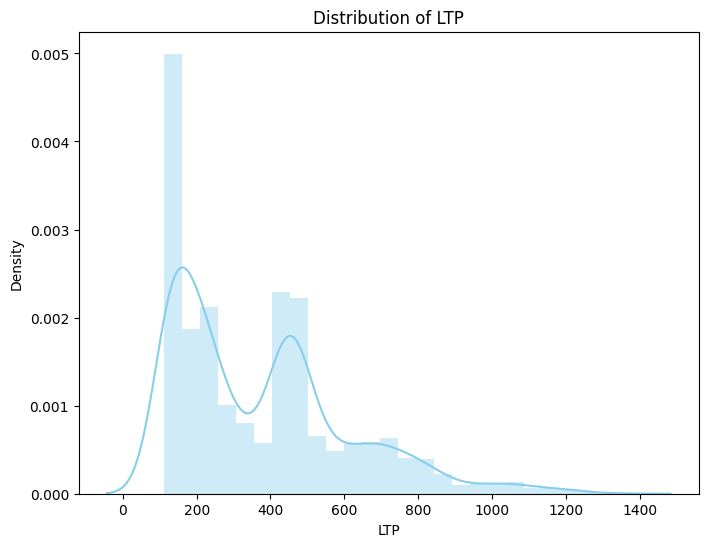

In [31]:
maximum_price = df['LTP'].max()
minimum_price = df['LTP'].min()
mean_price = df['LTP'].mean()
median_price = df['LTP'].median()
std_price = df['LTP'].std()

print("Maximum price: ", maximum_price)
print("Minimum price: ", minimum_price)
print("Mean price: ", mean_price)
print("Median price: ", median_price)
print("Standard Deviation of price: ", std_price)
print(df['LTP'].head(10))
# Plotting the distribution of the LTP
plt.figure(figsize=(8, 6))
sns.distplot(df['LTP'], color='skyblue')
plt.title('Distribution of LTP')
plt.xlabel('LTP')
plt.ylabel('Density')
plt.show()



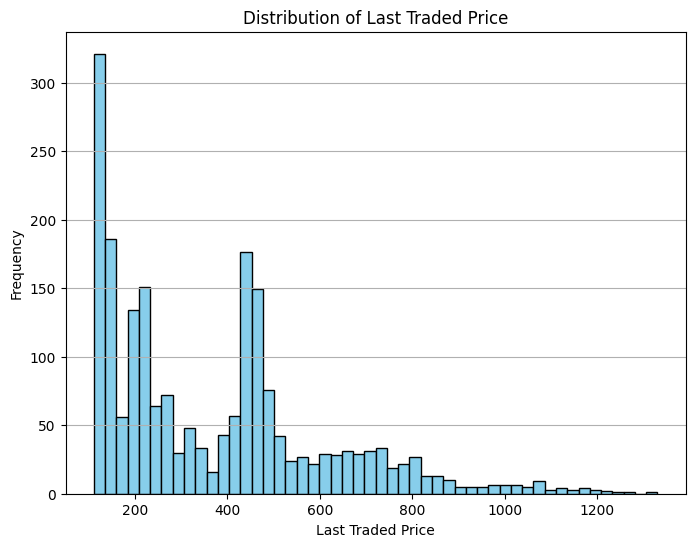

In [32]:
plt.figure(figsize=(8, 6))
plt.hist(df['LTP'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Last Traded Price')
plt.xlabel('Last Traded Price')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()


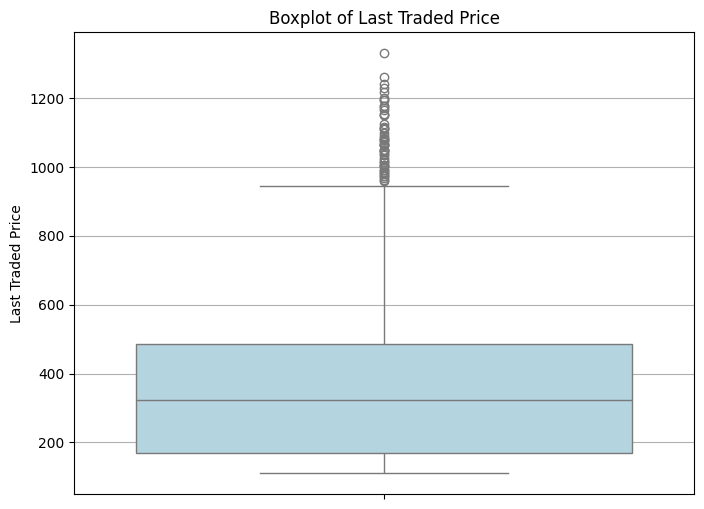

In [33]:
import seaborn as sns

# Plotting a boxplot to visualize the distribution and outliers of 'LTP' (Last Traded Price)
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['LTP'], color='lightblue')
plt.title('Boxplot of Last Traded Price')
plt.ylabel('Last Traded Price')
plt.grid(axis='y')
plt.show()


In [34]:
from statsmodels.tsa.arima.model import ARIMA
reverse_ltp = df['LTP'].iloc[::-1]
model = ARIMA(reverse_ltp, order=(5, 1, 0))
model_fit = model.fit()


In [35]:
forecast = model_fit.forecast(steps=10)

In [36]:
forecast, df["LTP"].head(1)

(-1     684.486514
 -2     679.223908
 -3     679.950190
 -4     680.986039
 -5     680.620607
 -6     681.013146
 -7     680.830829
 -8     680.636629
 -9     680.819166
 -10    680.825629
 Name: predicted_mean, dtype: float64,
 0    679.49
 Name: LTP, dtype: float64)

In [37]:
# Daily_volatility i.e Fluctuation of Share Price(Standard Deviation)
daily_volatility = df['LTP'].pct_change().rolling(window=20).std()
daily_volatility

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
2076    0.032234
2077    0.036583
2078    0.040827
2079    0.045639
2080    0.044050
Name: LTP, Length: 2081, dtype: float64

### Daily Volatility 

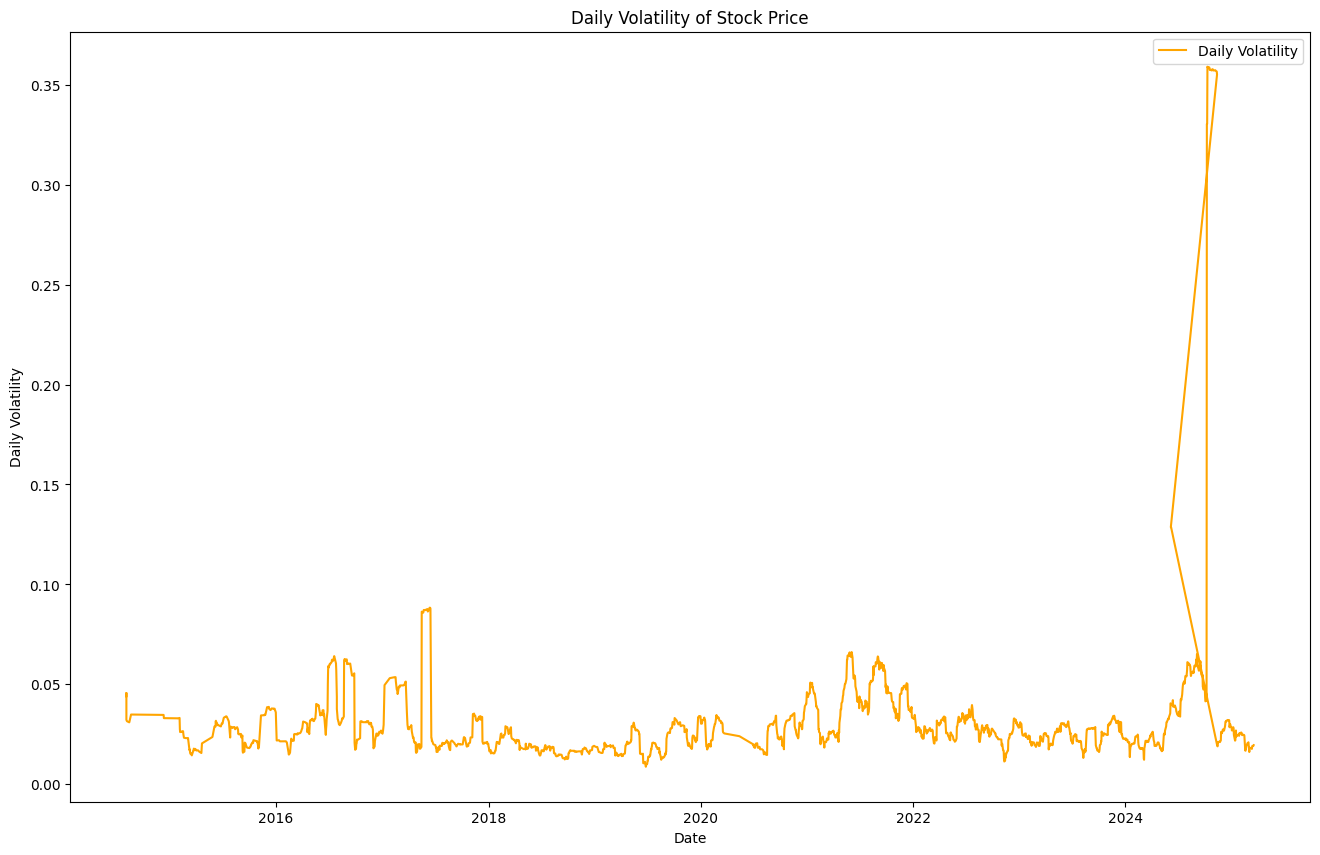

In [38]:
plt.figure(figsize=(16, 10))
plt.plot(df["Date"], daily_volatility, label='Daily Volatility', color='orange')
# plt.plot(df["Date"].head(100), daily_volatility.head(100), label='Daily Volatility', color='orange')
plt.title('Daily Volatility of Stock Price')
plt.xlabel('Date')
plt.ylabel('Daily Volatility')
plt.legend()
plt.show()

In [39]:
df.set_index('Date', inplace=True)
df

,LTP,%change,High,Low,Open,Qty.,Turnover,Month,Fluctuation
Date,,,,,,,,,
2025-04-17,679.49,1.38,683.5,666.0,680.0,24755.0,16736019.5,4,1.38
2025-04-16,670.26,-1.21,680.0,668.4,680.0,10581.0,7110607.4,4,-1.21
2025-04-15,678.48,2.97,700.0,660.0,670.0,31114.0,21130077.4,4,2.97
2025-04-13,658.90,-0.51,675.0,655.2,655.2,15436.0,10209578.2,4,-0.51
2025-04-10,662.27,0.15,683.9,660.0,674.5,12415.0,8248432.1,4,0.15
...,...,...,...,...,...,...,...,...,...
2014-08-04,267.00,-1.84,267.0,267.0,272.0,40.0,10680.0,8,-1.84
2014-08-04,249.00,-1.97,249.0,249.0,254.0,249.0,10680.0,8,-1.97
2014-08-04,272.00,9.24,272.0,253.0,249.0,4030.0,10680.0,8,9.24


In [40]:
# Monthly Volatility
monthly_volatility = df['LTP'].resample('M').std()
# Yesle chai harey month ma vako volatility wa fluctuation lai dekhauxa
monthly_volatility.shape

C:\Users\baral\AppData\Local\Temp\ipykernel_3776\3425375360.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_volatility = df['LTP'].resample('M').std()


(129,)

In [41]:
monthly_volatility

Date
2014-08-31     9.721111
2014-09-30          NaN
2014-10-31          NaN
2014-11-30          NaN
2014-12-31     9.192388
                ...    
2024-12-31    50.006908
2025-01-31    47.131462
2025-02-28    21.970569
2025-03-31    36.599622
2025-04-30     8.749087
Freq: ME, Name: LTP, Length: 129, dtype: float64

C:\Users\baral\AppData\Local\Temp\ipykernel_3776\4163979899.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


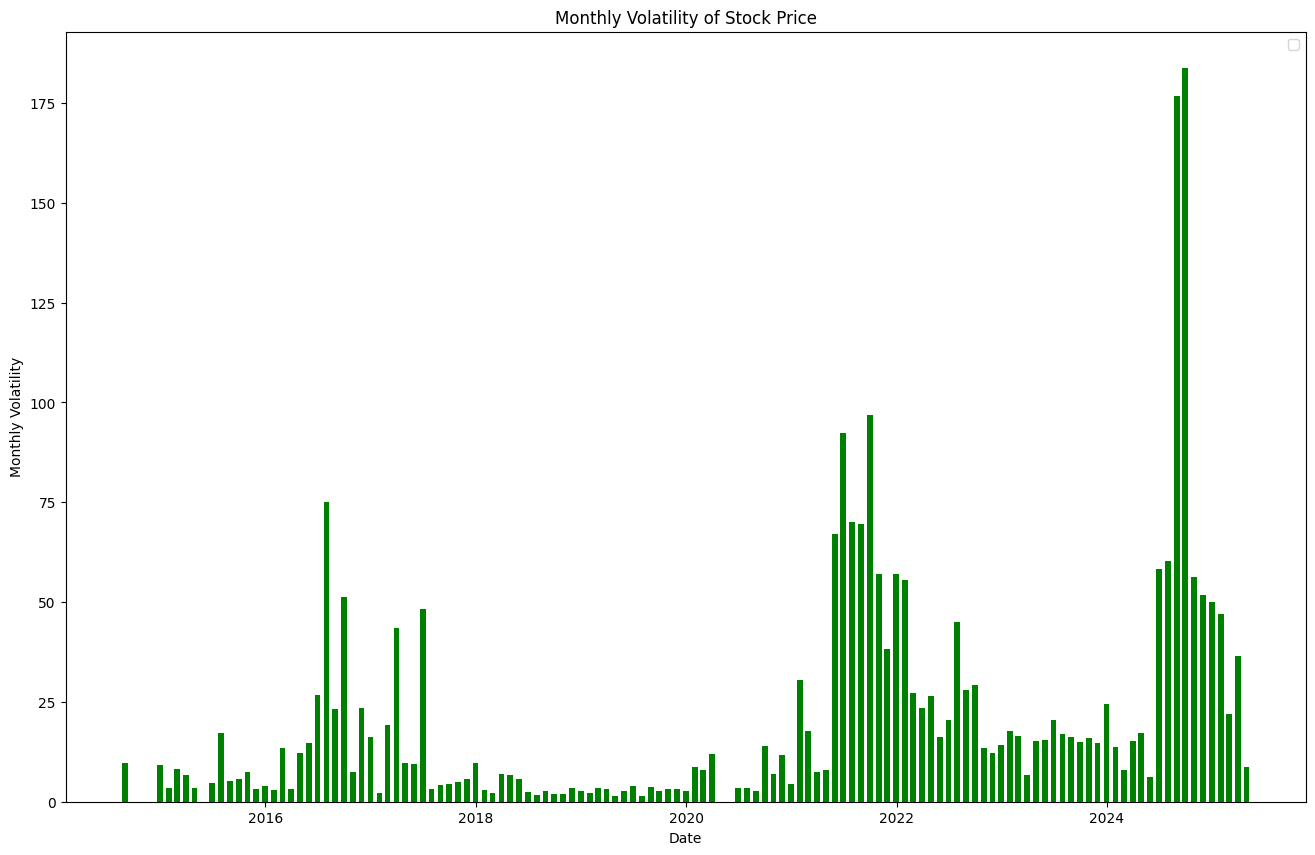

In [42]:
plt.figure(figsize=(16, 10))
plt.bar(monthly_volatility.index, monthly_volatility, color='green', alpha=1, width=20)
plt.title('Monthly Volatility of Stock Price')
plt.xlabel('Date')
plt.ylabel('Monthly Volatility')
plt.legend()
plt.show()


In [43]:
monthly_change = df['%change'].resample('M').mean()


C:\Users\baral\AppData\Local\Temp\ipykernel_3776\447517881.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_change = df['%change'].resample('M').mean()


In [44]:
monthly_change

Date
2014-08-31    0.750000
2014-09-30         NaN
2014-10-31         NaN
2014-11-30         NaN
2014-12-31    1.640000
                ...   
2024-12-31   -1.109500
2025-01-31   -0.263158
2025-02-28    0.080000
2025-03-31   -0.356500
2025-04-30    0.077273
Freq: ME, Name: %change, Length: 129, dtype: float64

### Monthly % change 

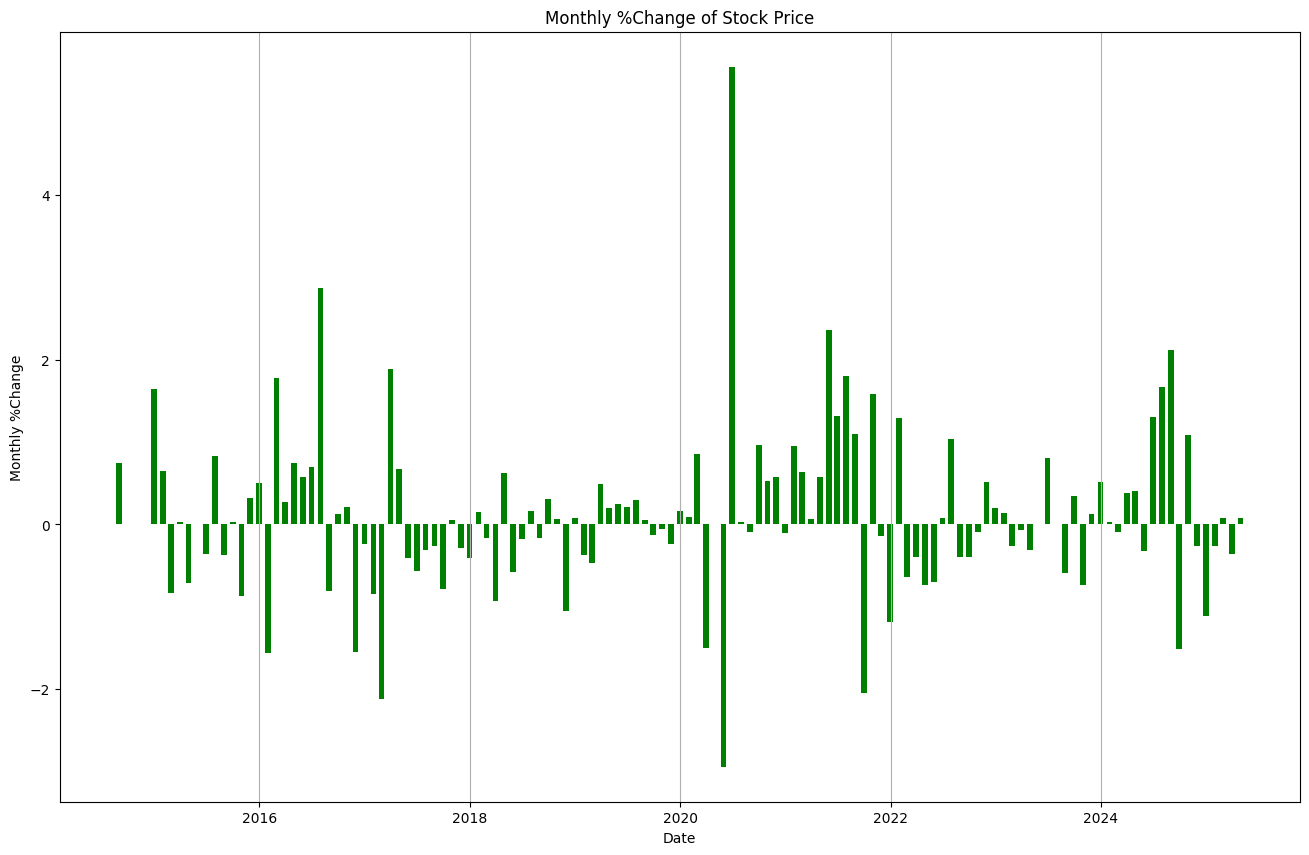

In [45]:
# Plot the monthly %change
plt.figure(figsize=(16, 10))
plt.bar(monthly_change.index, monthly_change, color='green', width=20)
plt.title('Monthly %Change of Stock Price')
plt.xlabel('Date')
plt.ylabel('Monthly %Change')
# grid along x_axis
plt.grid(axis='x')
plt.show()

In [46]:
df_reverse = df[::-1]
# this is done to arrange it according to the old date to new date
df_reverse

,LTP,%change,High,Low,Open,Qty.,Turnover,Month,Fluctuation
Date,,,,,,,,,
2014-08-04,254.00,1.60,254.0,245.0,250.0,833.0,10680.0,8,1.60
2014-08-04,250.00,4.60,255.0,243.0,239.0,3871.0,10680.0,8,4.60
2014-08-04,272.00,9.24,272.0,253.0,249.0,4030.0,10680.0,8,9.24
2014-08-04,249.00,-1.97,249.0,249.0,254.0,249.0,10680.0,8,-1.97
2014-08-04,267.00,-1.84,267.0,267.0,272.0,40.0,10680.0,8,-1.84
...,...,...,...,...,...,...,...,...,...
2025-04-10,662.27,0.15,683.9,660.0,674.5,12415.0,8248432.1,4,0.15
2025-04-13,658.90,-0.51,675.0,655.2,655.2,15436.0,10209578.2,4,-0.51
2025-04-15,678.48,2.97,700.0,660.0,670.0,31114.0,21130077.4,4,2.97


Moving Average of 50 days and 200 days

In [47]:
ma_20 = df_reverse['LTP'].rolling(window=20).mean()
ma_50 = df_reverse['LTP'].rolling(window=50).mean()
ma_100 = df_reverse['LTP'].rolling(window=100).mean()
ma_200 = df_reverse['LTP'].rolling(window=200).mean()


In [48]:
# show the ma_20, ma_50, ma_100, ma_200 in table form
ma_20, ma_50

(Date
 2014-08-04         NaN
 2014-08-04         NaN
 2014-08-04         NaN
 2014-08-04         NaN
 2014-08-04         NaN
                 ...   
 2025-04-10    678.0790
 2025-04-13    675.6640
 2025-04-15    674.0830
 2025-04-16    672.2010
 2025-04-17    670.9255
 Name: LTP, Length: 2081, dtype: float64,
 Date
 2014-08-04         NaN
 2014-08-04         NaN
 2014-08-04         NaN
 2014-08-04         NaN
 2014-08-04         NaN
                 ...   
 2025-04-10    713.5536
 2025-04-13    712.1916
 2025-04-15    711.4212
 2025-04-16    710.7864
 2025-04-17    709.7362
 Name: LTP, Length: 2081, dtype: float64)

In [49]:
ma_100, ma_200

(Date
 2014-08-04         NaN
 2014-08-04         NaN
 2014-08-04         NaN
 2014-08-04         NaN
 2014-08-04         NaN
                 ...   
 2025-04-10    782.2658
 2025-04-13    778.3638
 2025-04-15    773.6256
 2025-04-16    775.6502
 2025-04-17    777.8251
 Name: LTP, Length: 2081, dtype: float64,
 Date
 2014-08-04          NaN
 2014-08-04          NaN
 2014-08-04          NaN
 2014-08-04          NaN
 2014-08-04          NaN
                 ...    
 2025-04-10    817.58740
 2025-04-13    818.59190
 2025-04-15    819.65980
 2025-04-16    820.66610
 2025-04-17    821.72955
 Name: LTP, Length: 2081, dtype: float64)

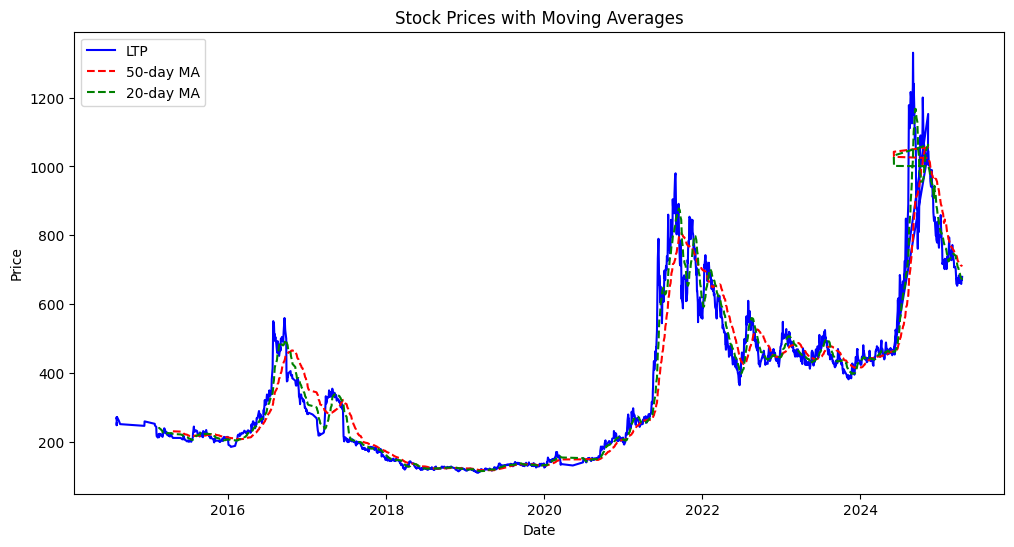

In [50]:
plt.figure(figsize=(12, 6))
plt.plot(df_reverse.index, df_reverse['LTP'], label='LTP', color='blue')
plt.plot(df_reverse.index, ma_50, label='50-day MA', color='red', linestyle='--')
plt.plot(df_reverse.index, ma_20, label='20-day MA', color='green', linestyle='--')
plt.title('Stock Prices with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [51]:
from ta.momentum import RSIIndicator

### RSI

C:\Users\baral\AppData\Local\Temp\ipykernel_3776\354248743.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reverse['RSI'] = rsi.rsi()


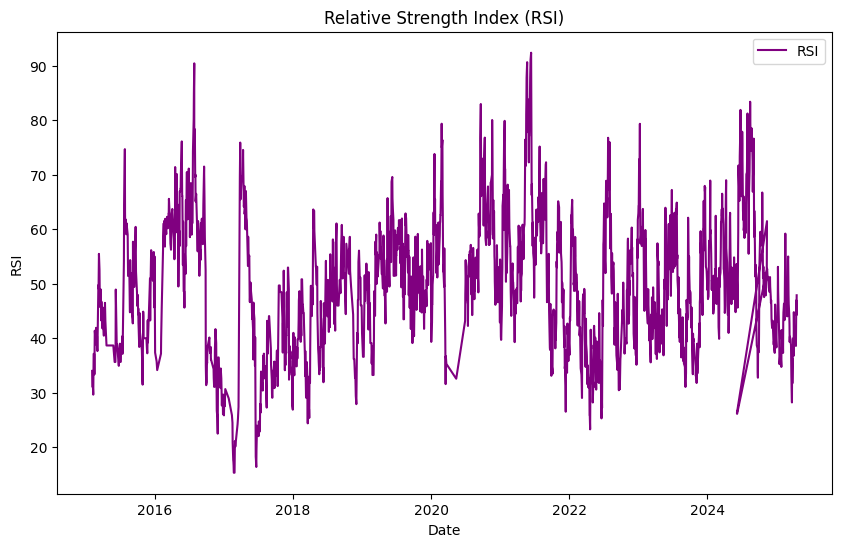

In [52]:
# Calculate RSI
# The RSI oscillates between zero and 100. Traditionally,
# an RSI reading of 70 or above indicates an
# overbought situation, and a reading of 30 or
# below indicates an oversold condition1.
rsi_period = 14
rsi = RSIIndicator(df_reverse['LTP'], window=rsi_period)
df_reverse['RSI'] = rsi.rsi()

plt.figure(figsize=(10, 6))
plt.plot(df_reverse.index, df_reverse['RSI'], label='RSI', color='purple')
plt.title('Relative Strength Index (RSI)')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()
plt.show()

C:\Users\baral\AppData\Local\Temp\ipykernel_3776\914170198.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reverse['Rolling_min'] = df_reverse['LTP'].rolling(window=10).min()


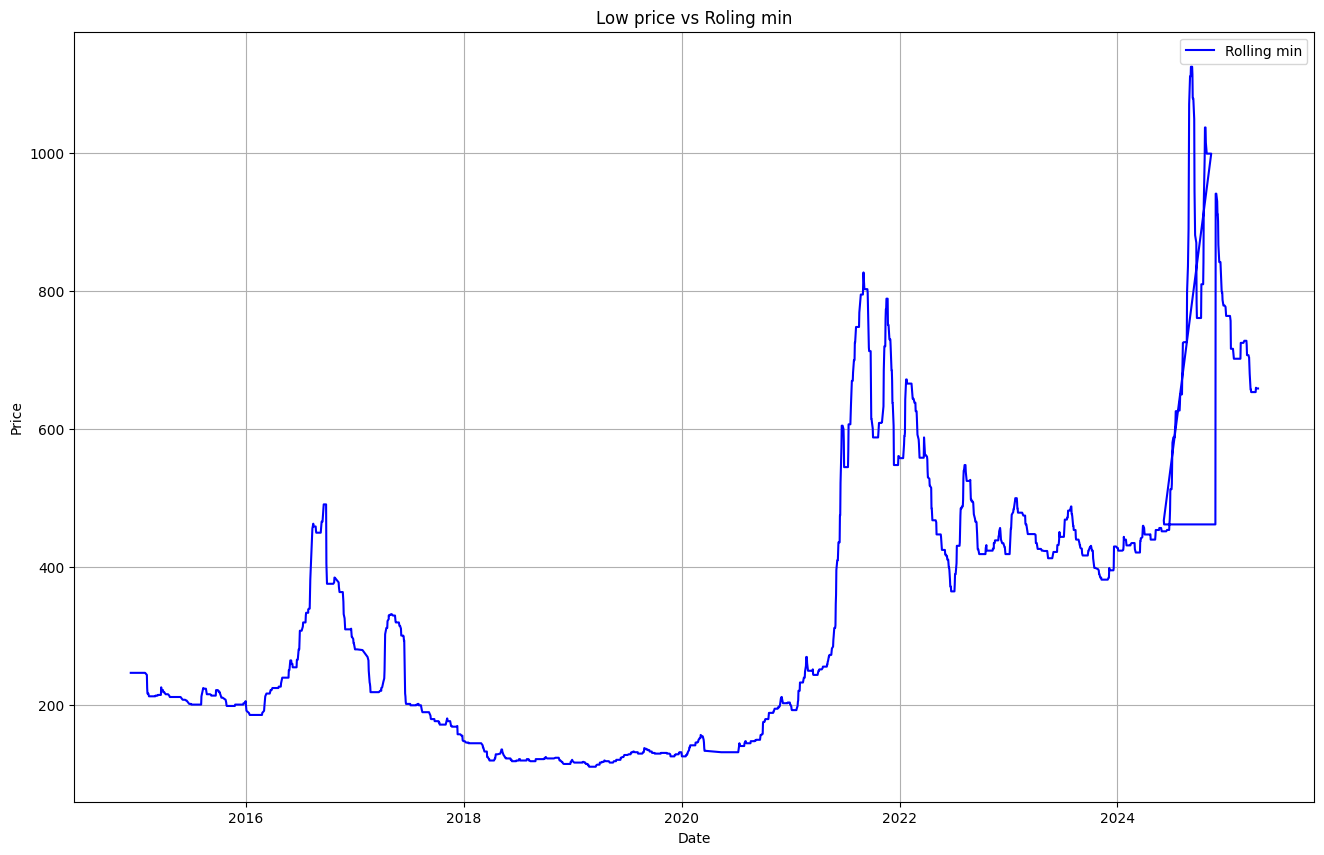

In [53]:
df_reverse['Rolling_min'] = df_reverse['LTP'].rolling(window=10).min()
plt.figure(figsize=(16,10))
plt.plot(df_reverse.index, df_reverse['Rolling_min'],label= "Rolling min",color='blue')
plt.title('Low price vs Roling min')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()



In [54]:
df_reverse['Rolling_min'].tail(10), df_reverse['LTP'].tail(10)

(Date
 2025-04-02    653.67
 2025-04-03    653.67
 2025-04-07    653.67
 2025-04-08    653.67
 2025-04-09    653.67
 2025-04-10    660.00
 2025-04-13    658.90
 2025-04-15    658.90
 2025-04-16    658.90
 2025-04-17    658.90
 Name: Rolling_min, dtype: float64,
 Date
 2025-04-02    683.83
 2025-04-03    671.52
 2025-04-07    663.40
 2025-04-08    662.25
 2025-04-09    661.30
 2025-04-10    662.27
 2025-04-13    658.90
 2025-04-15    678.48
 2025-04-16    670.26
 2025-04-17    679.49
 Name: LTP, dtype: float64)

 Volatility Analysis: Standard Deviation of Returns

Volatility (Standard Deviation of Daily Returns): 0.0469


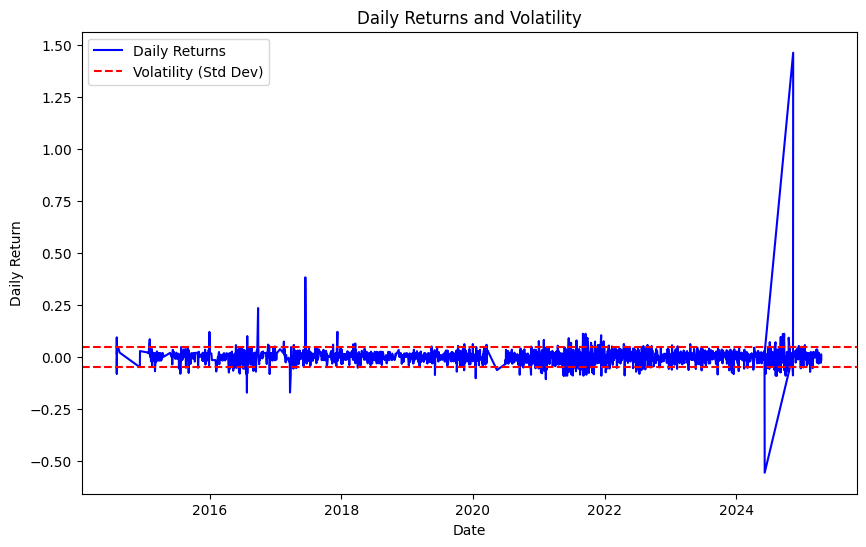

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data
# # data = pd.read_csv("stock_data.csv")
# data = df

# Convert columns to numeric
# data['Qty.'] = data['Qty.'].str.replace(',', '').astype(float)
# data['Turnover'] = data['Turnover'].str.replace(',', '').astype(float)

# Calculate daily returns
data['Daily Return'] = data['LTP'].pct_change()

# Calculate standard deviation of daily returns (volatility)
volatility = data['Daily Return'].std()
print(f"Volatility (Standard Deviation of Daily Returns): {volatility:.4f}")

# Plot daily returns
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['Daily Return'], label='Daily Returns', color='blue')
plt.axhline(y=volatility, color='red', linestyle='--', label='Volatility (Std Dev)')
plt.axhline(y=-volatility, color='red', linestyle='--')
plt.title('Daily Returns and Volatility')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.legend()
plt.show()

### Bollinger Bands

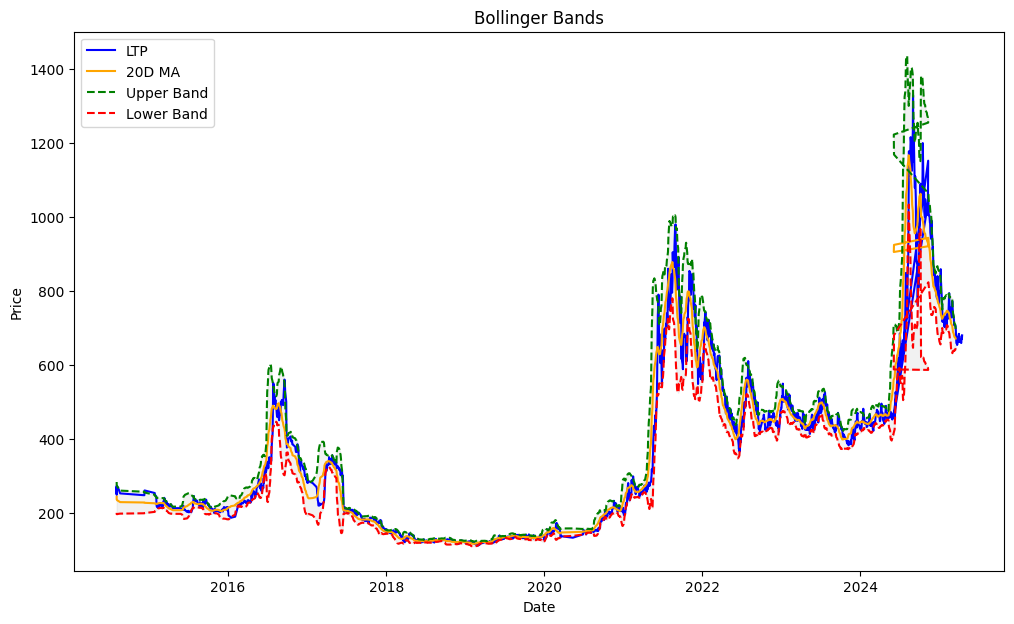

In [56]:
# Calculate 20-day moving average
data['20D MA'] = data['LTP'].rolling(window=20).mean()

# Calculate 20-day standard deviation
data['20D Std Dev'] = data['LTP'].rolling(window=20).std()

# Calculate Bollinger Bands
data['Upper Band'] = data['20D MA'] + (2 * data['20D Std Dev'])
data['Lower Band'] = data['20D MA'] - (2 * data['20D Std Dev'])

# Plot Bollinger Bands
plt.figure(figsize=(12, 7))
plt.plot(data['Date'], data['LTP'], label='LTP', color='blue')
plt.plot(data['Date'], data['20D MA'], label='20D MA', color='orange')
plt.plot(data['Date'], data['Upper Band'], label='Upper Band', color='green', linestyle='--')
plt.plot(data['Date'], data['Lower Band'], label='Lower Band', color='red', linestyle='--')
plt.fill_between(data['Date'], data['Upper Band'], data['Lower Band'], color='lightgray', alpha=0.3)
plt.title('Bollinger Bands')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

Volume Analysis: Trading Volume Analysis

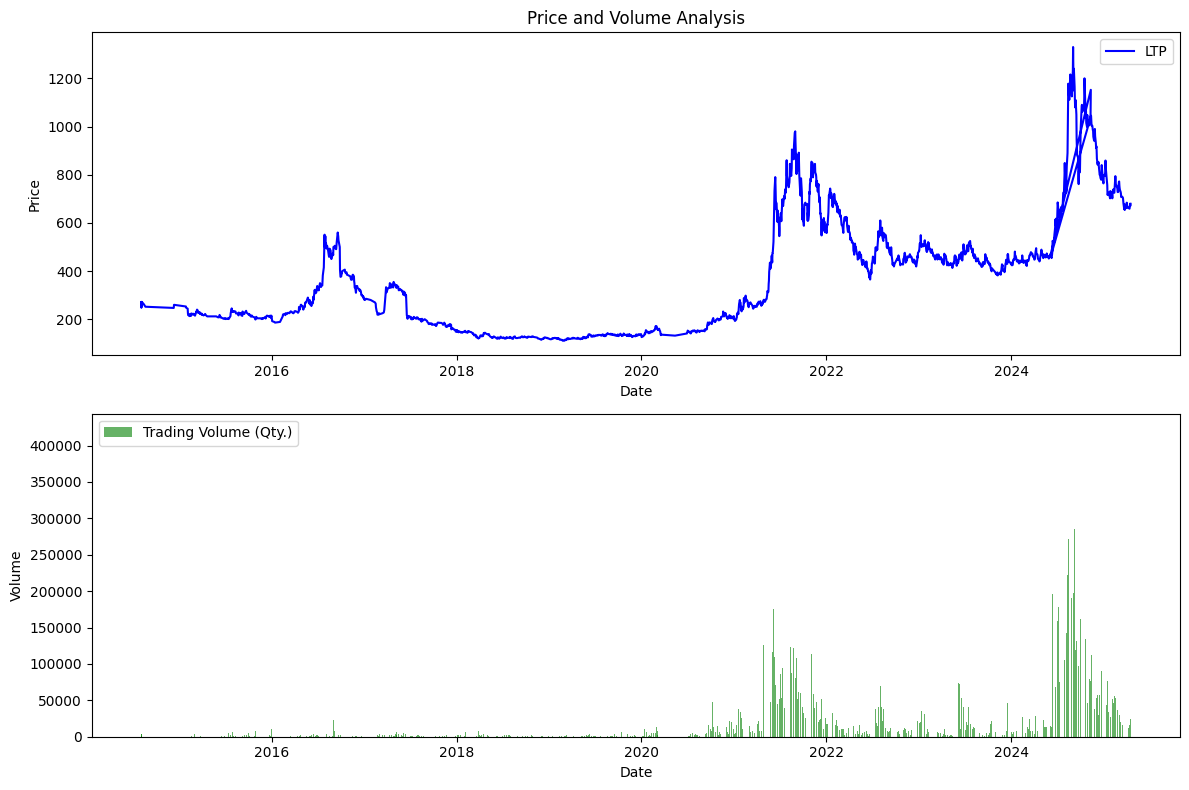

Correlation between Trading Volume (Qty.) and Price: 0.67


In [57]:

# Convert columns to numeric
# data['Qty.'] = data['Qty.'].str.replace(',', '').astype(float)
# data['Turnover'] = data['Turnover'].str.replace(',', '').astype(float)

# Plot Price and Volume
plt.figure(figsize=(12, 8))

# Plot LTP (Price)
plt.subplot(2, 1, 1)
plt.plot(data['Date'], data['LTP'], label='LTP', color='blue')
plt.title('Price and Volume Analysis')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

# Plot Trading Volume (Qty.)
plt.subplot(2, 1, 2)
plt.bar(data['Date'], data['Qty.'], label='Trading Volume (Qty.)', color='green', alpha=0.6)
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()

plt.tight_layout()
plt.show()

# Correlation between Volume and Price
correlation = data['Qty.'].corr(data['LTP'])
print(f"Correlation between Trading Volume (Qty.) and Price: {correlation:.2f}")

### MACD (Moving Average Convergence Divergence)

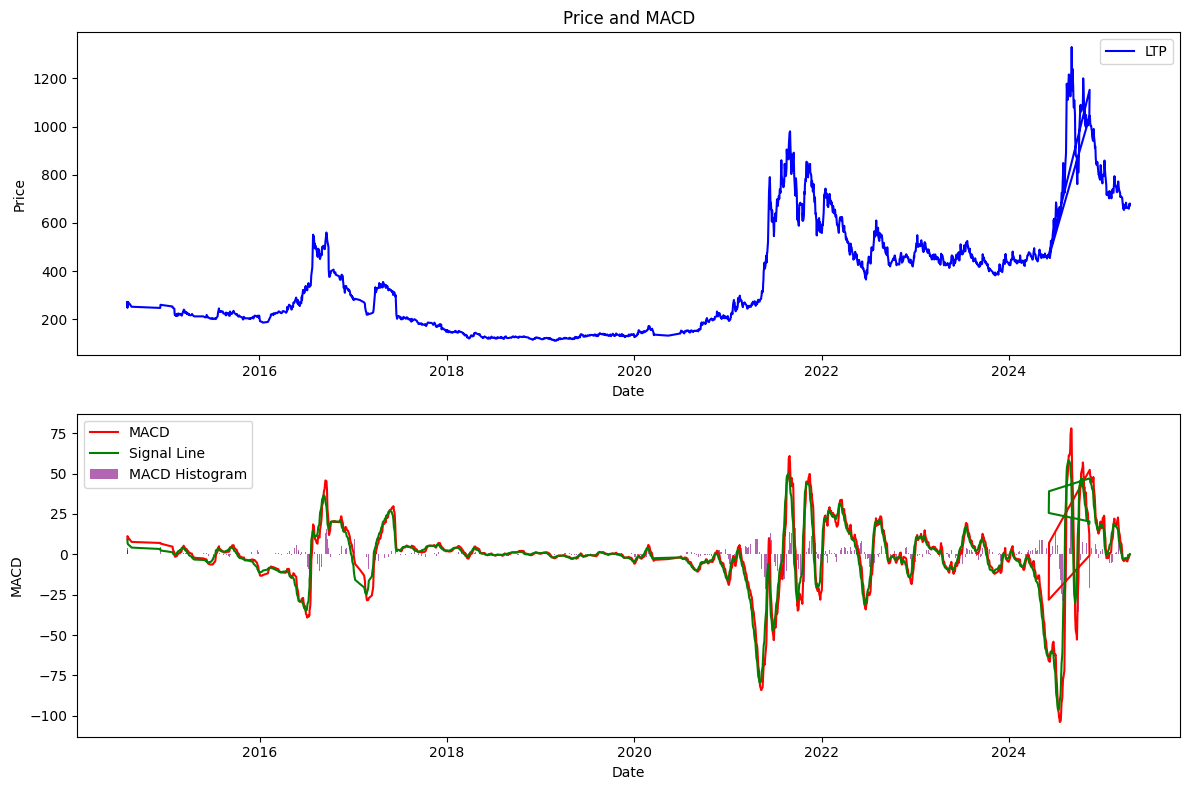

In [58]:
# Calculate MACD
def calculate_macd(data, short_window=12, long_window=26, signal_window=9):
    data['12D EMA'] = data['LTP'].ewm(span=short_window, adjust=False).mean()
    data['26D EMA'] = data['LTP'].ewm(span=long_window, adjust=False).mean()
    data['MACD'] = data['12D EMA'] - data['26D EMA']
    data['Signal Line'] = data['MACD'].ewm(span=signal_window, adjust=False).mean()
    data['MACD Histogram'] = data['MACD'] - data['Signal Line']
    return data

# Calculate MACD
data = calculate_macd(data)

# Plot MACD
plt.figure(figsize=(12, 8))

# Plot LTP (Price)
plt.subplot(2, 1, 1)
plt.plot(data['Date'], data['LTP'], label='LTP', color='blue')
plt.title('Price and MACD')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

# Plot MACD, Signal Line, and Histogram
plt.subplot(2, 1, 2)
plt.plot(data['Date'], data['MACD'], label='MACD', color='red')
plt.plot(data['Date'], data['Signal Line'], label='Signal Line', color='green')
plt.bar(data['Date'], data['MACD Histogram'], label='MACD Histogram', color='purple', alpha=0.6)
plt.xlabel('Date')
plt.ylabel('MACD')
plt.legend()

plt.tight_layout()
plt.show()

### Weekly and monthly volumn

C:\Users\baral\AppData\Local\Temp\ipykernel_3776\3572721918.py:23: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = data.resample('M').agg({


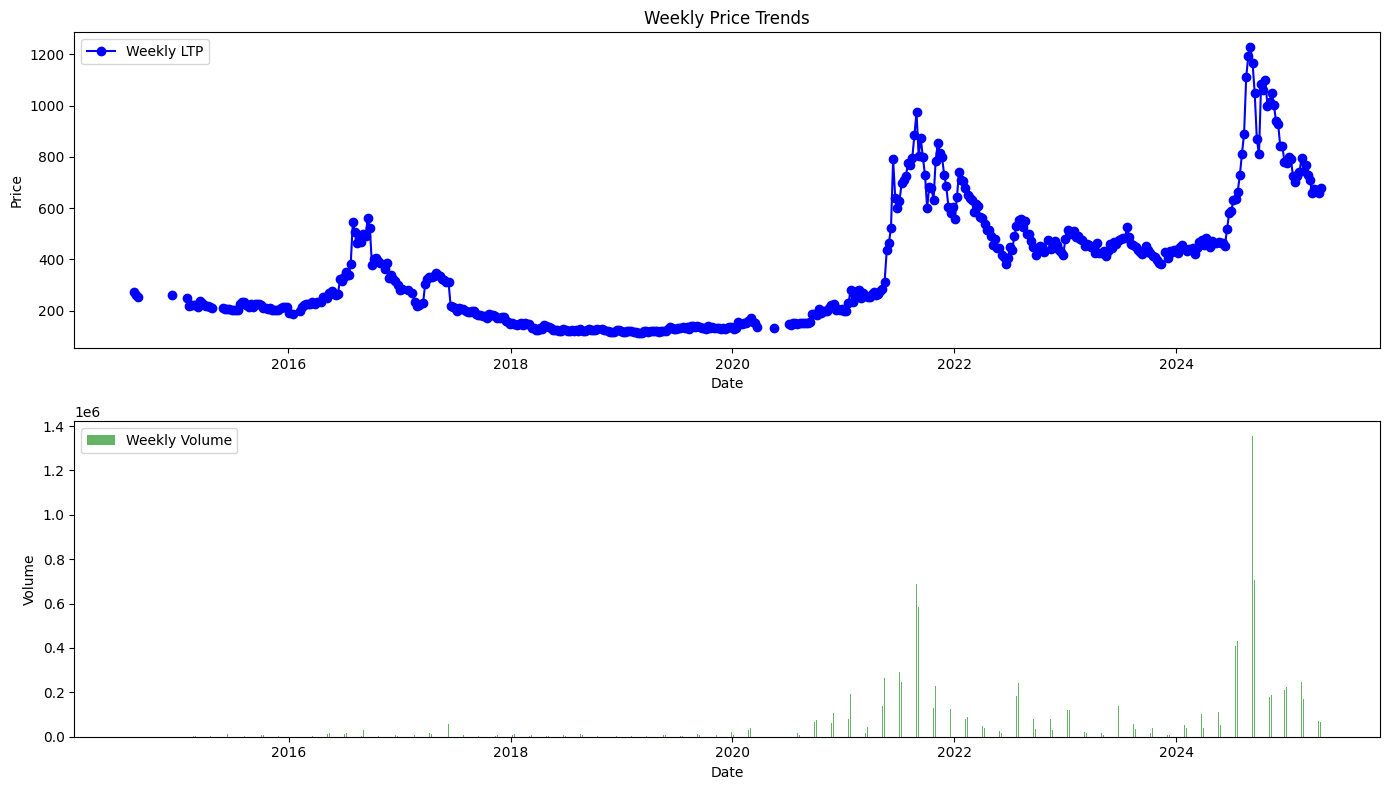

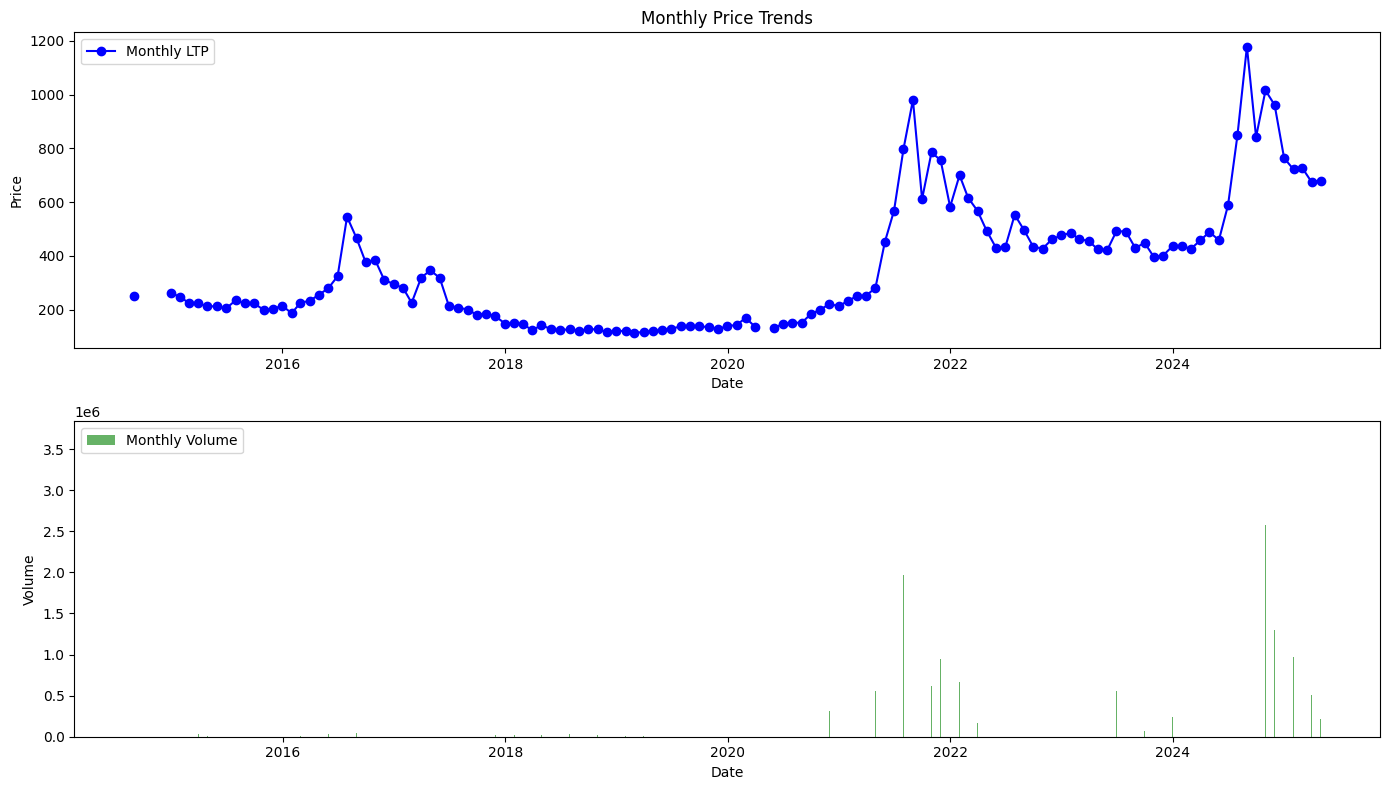

In [59]:
import pandas as pd
import matplotlib.pyplot as plt

# # Load data
# data = pd.read_csv("stock_data.csv")

# Convert 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'])

# Set 'Date' as the index
data.set_index('Date', inplace=True)

# Resample data to weekly and monthly time frames
weekly_data = data.resample('W').agg({
    'LTP': 'last',  # Use the last price of the week
    'High': 'max',  # Use the highest price of the week
    'Low': 'min',   # Use the lowest price of the week
    'Open': 'first',  # Use the first price of the week
    'Qty.': 'sum',  # Sum the trading volume for the week
    'Turnover': 'sum'  # Sum the turnover for the week
})

monthly_data = data.resample('M').agg({
    'LTP': 'last',  # Use the last price of the month
    'High': 'max',  # Use the highest price of the month
    'Low': 'min',   # Use the lowest price of the month
    'Open': 'first',  # Use the first price of the month
    'Qty.': 'sum',  # Sum the trading volume for the month
    'Turnover': 'sum'  # Sum the turnover for the month
})

# Plot weekly trends
plt.figure(figsize=(14, 8))

# Weekly LTP
plt.subplot(2, 1, 1)
plt.plot(weekly_data.index, weekly_data['LTP'], label='Weekly LTP', color='blue', marker='o')
plt.title('Weekly Price Trends')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

# Weekly Volume
plt.subplot(2, 1, 2)
plt.bar(weekly_data.index, weekly_data['Qty.'], label='Weekly Volume', color='green', alpha=0.6)
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()

plt.tight_layout()
plt.show()

# Plot monthly trends
plt.figure(figsize=(14, 8))

# Monthly LTP
plt.subplot(2, 1, 1)
plt.plot(monthly_data.index, monthly_data['LTP'], label='Monthly LTP', color='blue', marker='o')
plt.title('Monthly Price Trends')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

# Monthly Volume
plt.subplot(2, 1, 2)
plt.bar(monthly_data.index, monthly_data['Qty.'], label='Monthly Volume', color='green', alpha=0.6)
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()

plt.tight_layout()
plt.show()

In [60]:
data.head()

,LTP,%change,High,Low,Open,Qty.,Turnover,Month,Fluctuation,Daily Return,20D MA,20D Std Dev,Upper Band,Lower Band,12D EMA,26D EMA,MACD,Signal Line,MACD Histogram
Date,,,,,,,,,,,,,,,,,,,
2025-04-17,679.49,1.38,683.5,666.0,680.0,24755.0,16736019.5,4,1.38,NaN,NaN,NaN,NaN,NaN,679.490000,679.490000,0.000000,0.000000,0.000000
2025-04-16,670.26,-1.21,680.0,668.4,680.0,10581.0,7110607.4,4,-1.21,-0.013584,NaN,NaN,NaN,NaN,678.070000,678.806296,-0.736296,-0.147259,-0.589037
2025-04-15,678.48,2.97,700.0,660.0,670.0,31114.0,21130077.4,4,2.97,0.012264,NaN,NaN,NaN,NaN,678.133077,678.782126,-0.649049,-0.247617,-0.401432
2025-04-13,658.90,-0.51,675.0,655.2,655.2,15436.0,10209578.2,4,-0.51,-0.028859,NaN,NaN,NaN,NaN,675.174142,677.309376,-2.135234,-0.625141,-1.510093
2025-04-10,662.27,0.15,683.9,660.0,674.5,12415.0,8248432.1,4,0.15,0.005115,NaN,NaN,NaN,NaN,673.188889,676.195348,-3.006459,-1.101404,-1.905055


C:\Users\baral\AppData\Local\Temp\ipykernel_3776\3749767758.py:27: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Bull' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  data.loc[data['LTP'] > data['50D MA'], 'Market Condition'] = 'Bull'
C:\Users\baral\AppData\Local\Temp\ipykernel_3776\3749767758.py:29: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Market Condition'].fillna(method='ffill', inplace=Tr

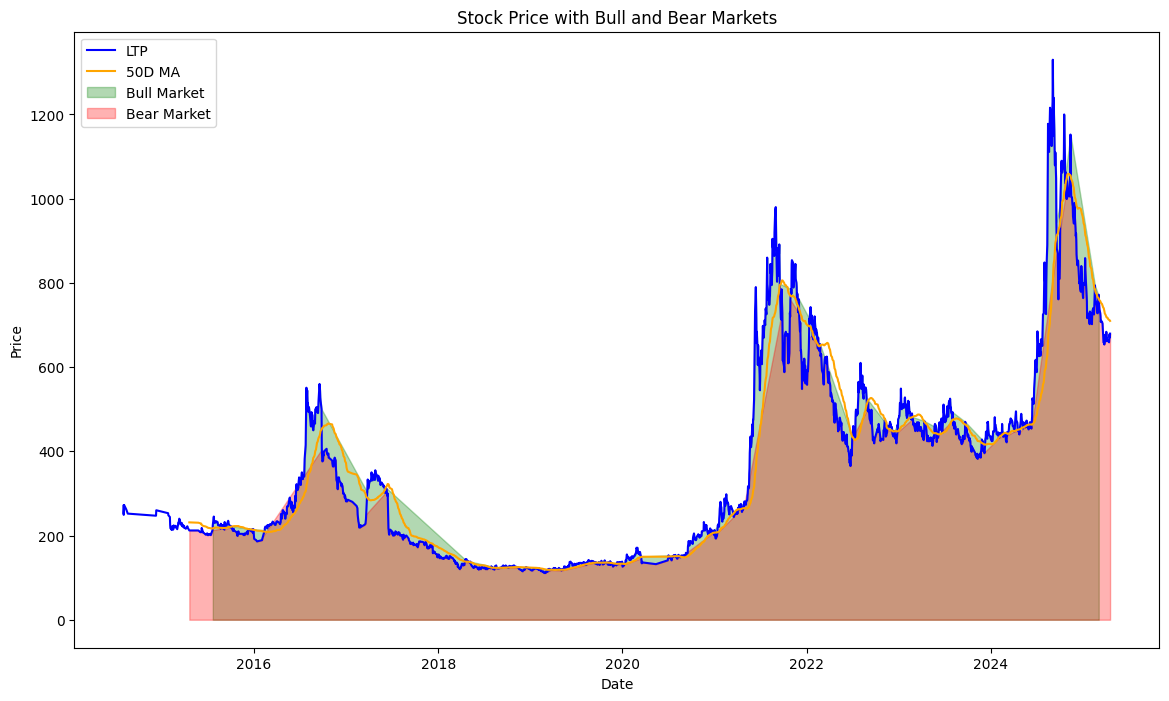

Average Daily Return during Bull Markets: 0.0072
Average Daily Return during Bear Markets: -0.0051


In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import argrelextrema

# Load data
# data = pd.read_csv("stock_data.csv")

# # Convert 'Date' column to datetime
# data['Date'] = pd.to_datetime(data['Date'])

# # Set 'Date' as the index
# data.set_index('Date', inplace=True)

# Sort data by date (ascending)
data.sort_index(inplace=True)

# Calculate daily returns
data['Daily Return'] = data['LTP'].pct_change()

# Define a 50-day moving average
window_ma = 50
data['50D MA'] = data['LTP'].rolling(window=window_ma).mean()

# Identify bull and bear markets based on moving average crossover
data['Market Condition'] = np.nan
data.loc[data['LTP'] > data['50D MA'], 'Market Condition'] = 'Bull'
data.loc[data['LTP'] < data['50D MA'], 'Market Condition'] = 'Bear'
data['Market Condition'].fillna(method='ffill', inplace=True)  # Forward fill to propagate the last valid observation

# Plot market conditions
plt.figure(figsize=(14, 8))
plt.plot(data.index, data['LTP'], label='LTP', color='blue')
plt.plot(data.index, data['50D MA'], label='50D MA', color='orange')

# Highlight bull and bear markets
bull_market = data[data['Market Condition'] == 'Bull']
bear_market = data[data['Market Condition'] == 'Bear']

plt.fill_between(bull_market.index, bull_market['LTP'], color='green', alpha=0.3, label='Bull Market')
plt.fill_between(bear_market.index, bear_market['LTP'], color='red', alpha=0.3, label='Bear Market')

plt.title('Stock Price with Bull and Bear Markets')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Analyze performance during bull and bear markets
bull_performance = data[data['Market Condition'] == 'Bull']['Daily Return'].mean()
bear_performance = data[data['Market Condition'] == 'Bear']['Daily Return'].mean()

print(f"Average Daily Return during Bull Markets: {bull_performance:.4f}")
print(f"Average Daily Return during Bear Markets: {bear_performance:.4f}")

### Support And Resistance

C:\Users\baral\AppData\Local\Temp\ipykernel_3776\3889140706.py:114: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_slice['MA'] = data_slice['LTP'].rolling(window=window).mean()
C:\Users\baral\AppData\Local\Temp\ipykernel_3776\3889140706.py:114: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_slice['MA'] = data_slice['LTP'].rolling(window=window).mean()


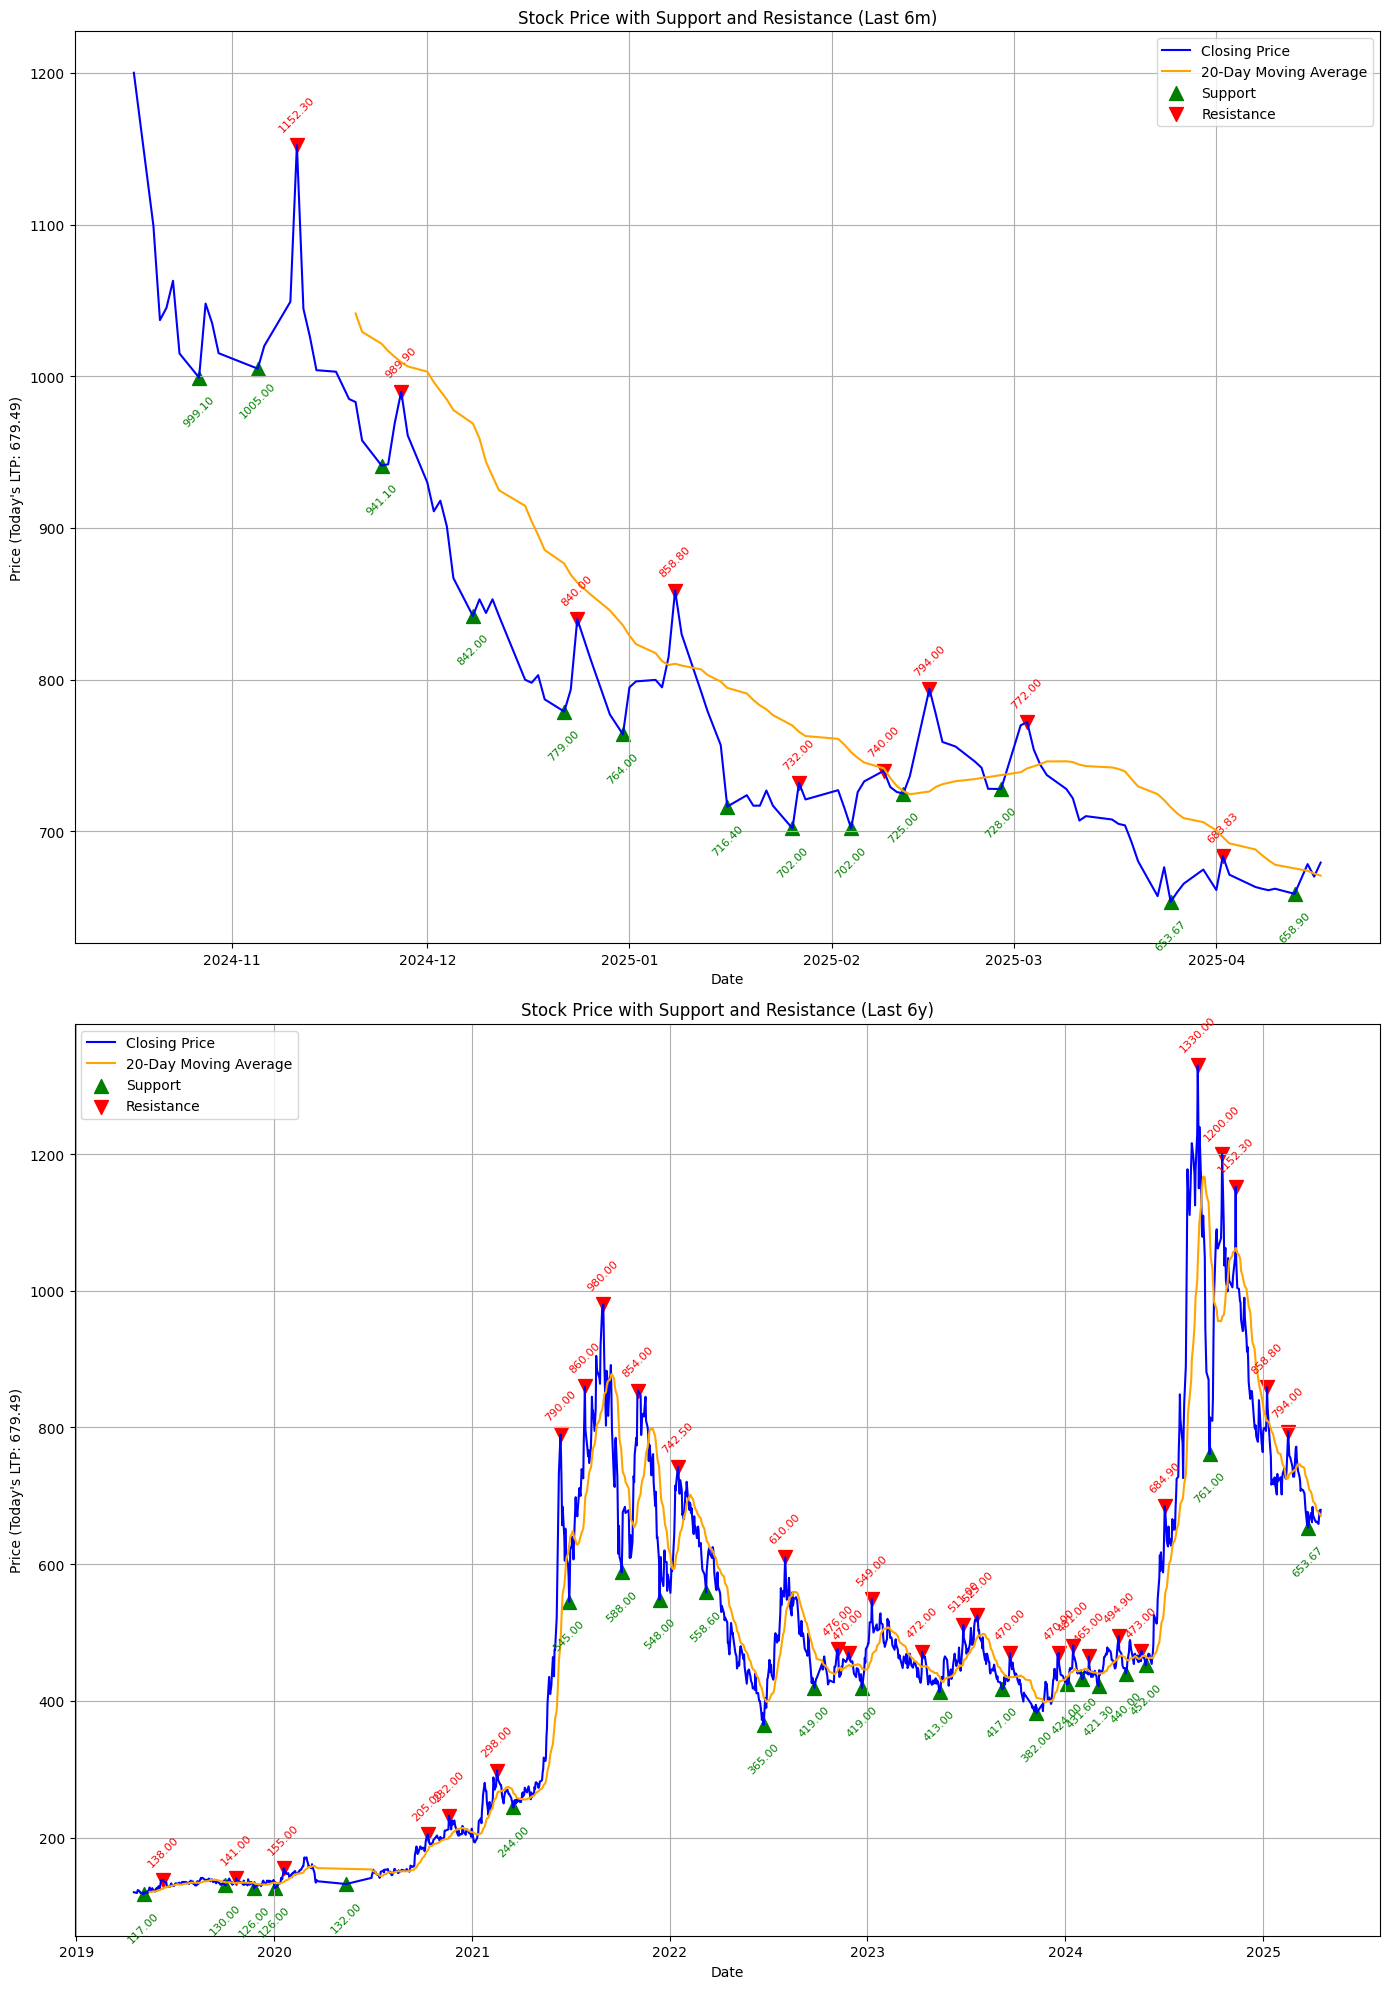

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import argrelextrema
from pandas.tseries.offsets import DateOffset

# Function to load and prepare the data
# def load_data(file_path):
#     data = pd.read_csv(file_path)
#     data['Date'] = pd.to_datetime(data['Date'])
#     data.set_index('Date', inplace=True)
#     data.sort_index(inplace=True)
#     return data

# Function to get user input for time frames
def get_user_time_frames():
    while True:
        # user_input = input("Enter time frames in months (m) or years (y), separated by commas (e.g., 6m,1y): ")
        user_input = "6m, 6y"
        time_frames = user_input.strip().split(',')  # Split input by commas
        valid_time_frames = []
        for tf in time_frames:
            tf = tf.strip()  # Remove any extra spaces
            if len(tf) < 2:
                print(f"Invalid input format: {tf}. Please try again.")
                continue
            try:
                quantity = int(tf[:-1])  # Extract numeric part
                unit = tf[-1].lower()  # Extract unit (m, y)
                if unit not in ['m', 'y']:  # Only allow months and years
                    print(f"Invalid time unit in {tf}. Please use 'm' for months or 'y' for years.")
                    continue
                if quantity < 0:
                    print(f"Time frame cannot be negative in {tf}. Please enter a positive value.")
                    continue
                valid_time_frames.append((quantity, unit))
            except ValueError:
                print(f"Invalid input: {tf}. Please enter a numeric value followed by 'm' or 'y'.")
        if valid_time_frames:
            return valid_time_frames
        else:
            print("No valid time frames entered. Please try again.")

# Function to calculate the start date based on user input
def calculate_start_date(end_date, quantity, unit):
    if unit == 'm':
        start_date = end_date - DateOffset(months=quantity)
    elif unit == 'y':
        start_date = end_date - DateOffset(years=quantity)
    else:
        raise ValueError("Invalid time unit.")
    return start_date

# Function to identify support and resistance levels
def find_support_resistance(data, order):
    local_min = argrelextrema(data['LTP'].values, np.less, order=order)[0]
    support_levels = data.iloc[local_min]['LTP']
    
    local_max = argrelextrema(data['LTP'].values, np.greater, order=order)[0]
    resistance_levels = data.iloc[local_max]['LTP']
    
    return support_levels, resistance_levels

# Function to annotate support and resistance levels without overlapping
def annotate_levels(ax, levels, color, vertical_offset):
    used_positions = set()  # Track used positions to avoid overlap
    for date, price in levels.items():
        # Check if the position is already occupied
        if (date, price) not in used_positions:
            ax.annotate(
                f'{price:.2f}', 
                (date, price), 
                textcoords="offset points", 
                xytext=(0, vertical_offset), 
                ha='center', 
                color=color, 
                fontsize=8, 
                rotation=45  # Rotate annotations for better fit
            )
            used_positions.add((date, price))  # Mark this position as used

# Main function to execute the analysis
def main():
    # file_path = 'stock_data.csv'  # Replace with your file path
    # data = load_data(file_path)
    end_date = data.index.max()
    time_frames = get_user_time_frames()
    
    # Parameters for moving average
    window = 20
    
    # Create subplots for each time frame
    fig, axes = plt.subplots(nrows=len(time_frames), ncols=1, figsize=(14, 10 * len(time_frames)))
    if len(time_frames) == 1:
        axes = [axes]  # Ensure axes is a list for single time frame
    
    for i, (quantity, unit) in enumerate(time_frames):
        start_date = calculate_start_date(end_date, quantity, unit)
        
        # Adjust start date if it's before the earliest date in the data
        if start_date < data.index.min():
            start_date = data.index.min()
            print(f"Start date adjusted to the earliest available date: {start_date}")
        
        data_slice = data.loc[start_date:end_date]
        
        # Adjust the `order` parameter based on the time frame
        if unit == 'm':
            order = max(3, quantity // 2)  # Smaller order for shorter time frames
        elif unit == 'y':
            order = max(5, quantity * 2)  # Larger order for longer time frames
        
        # Calculate moving averages and find support/resistance
        data_slice['MA'] = data_slice['LTP'].rolling(window=window).mean()
        support, resistance = find_support_resistance(data_slice, order)
        
        # Plotting
        axes[i].plot(data_slice.index, data_slice['LTP'], label='Closing Price', color='blue')
        axes[i].plot(data_slice.index, data_slice['MA'], label='20-Day Moving Average', color='orange')
        axes[i].scatter(support.index, support, marker='^', color='green', label='Support', s=100)
        axes[i].scatter(resistance.index, resistance, marker='v', color='red', label='Resistance', s=100)
        
        # Annotate support and resistance levels
        annotate_levels(axes[i], support, 'green', vertical_offset=-35)  # Support below the marker
        annotate_levels(axes[i], resistance, 'red', vertical_offset=10)  # Resistance above the marker
        
        # Add today's LTP to the y-axis label
        today_ltp = data_slice['LTP'].iloc[-1]
        axes[i].set_ylabel(f'Price (Today\'s LTP: {today_ltp:.2f})')
        
        axes[i].set_title(f'Stock Price with Support and Resistance (Last {quantity}{unit})')
        axes[i].set_xlabel('Date')
        axes[i].legend()
        axes[i].grid(True)
    
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()

### Volumn in Weeks and Months

C:\Users\baral\AppData\Local\Temp\ipykernel_3776\301463846.py:16: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_volume = df['Qty.'].resample('M').sum()  # Monthly volume


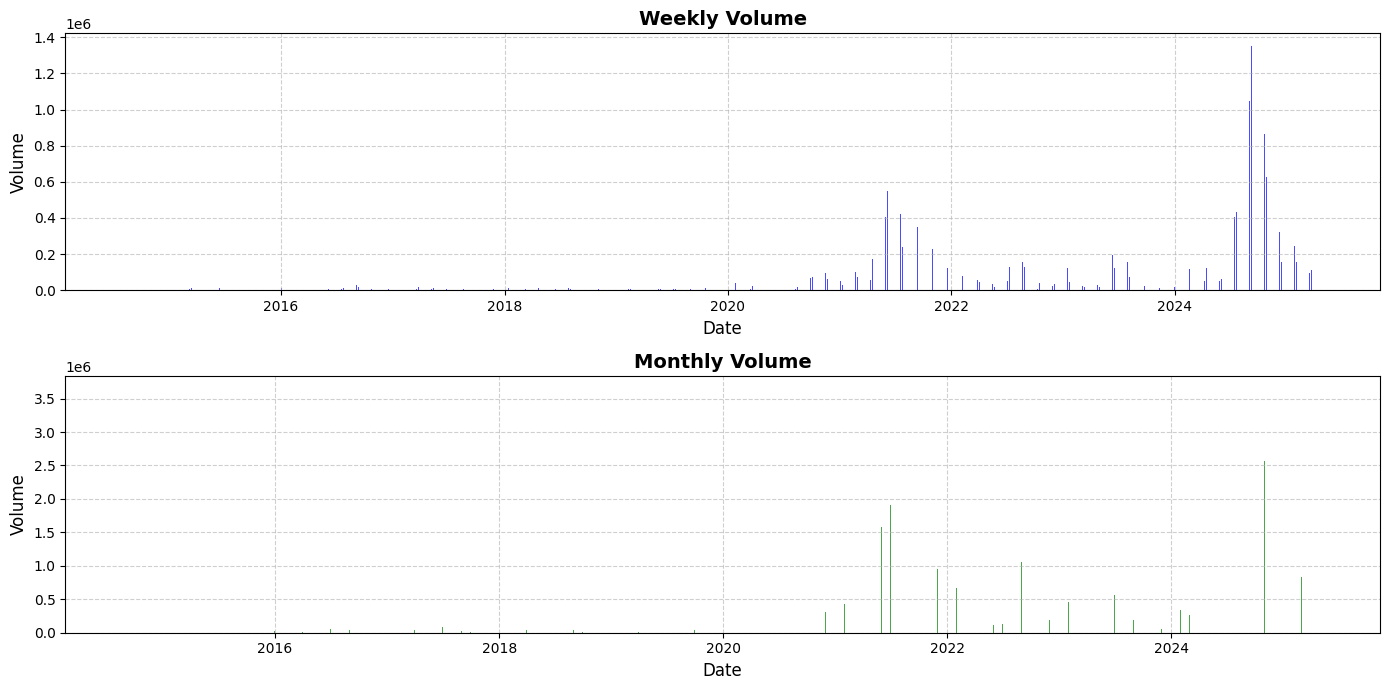

Weekly Volume:
Date
2014-08-10      9619.0
2014-08-17      1032.0
2014-08-24       153.0
2014-08-31         0.0
2014-09-07         0.0
                ...   
2025-03-23    111286.0
2025-03-30     87782.0
2025-04-06     78259.0
2025-04-13     68815.0
2025-04-20     66450.0
Freq: W-SUN, Name: Qty., Length: 559, dtype: float64

Monthly Volume:
Date
2014-08-31      10804.0
2014-09-30          0.0
2014-10-31          0.0
2014-11-30          0.0
2014-12-31        559.0
                ...    
2024-12-31    1065610.0
2025-01-31     968363.0
2025-02-28     830106.0
2025-03-31     504264.0
2025-04-30     213524.0
Freq: ME, Name: Qty., Length: 129, dtype: float64


In [63]:
import pandas as pd
import matplotlib.pyplot as plt



# # Clean and preprocess the data
# df['Date'] = pd.to_datetime(df['Date'], format='%Y/%m/%d')  # Convert 'Date' to datetime
# df['Qty.'] = df['Qty.'].str.replace(',', '').astype(float)  # Convert 'Qty.' to numeric
# df['Turnover'] = df['Turnover'].str.replace(',', '').astype(float)  # Convert 'Turnover' to numeric

# Set 'Date' as the index
# df.set_index('Date', inplace=True)

# Resample for weekly and monthly volume
weekly_volume = df['Qty.'].resample('W').sum()  # Weekly volume
monthly_volume = df['Qty.'].resample('M').sum()  # Monthly volume

# Plot the results
plt.figure(figsize=(14, 7))

# Weekly Volume
plt.subplot(2, 1, 1)
plt.bar(weekly_volume.index, weekly_volume, color='blue', alpha=0.7)
plt.title('Weekly Volume', fontsize=14, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Volume', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

# Monthly Volume
plt.subplot(2, 1, 2)
plt.bar(monthly_volume.index, monthly_volume, color='green', alpha=0.7)
plt.title('Monthly Volume', fontsize=14, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Volume', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

# Print the results
print("Weekly Volume:")
print(weekly_volume)

print("\nMonthly Volume:")
print(monthly_volume)

C:\Users\baral\AppData\Local\Temp\ipykernel_3776\2280330994.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_volume = df['Qty.'].resample('M').sum()  # Monthly volume


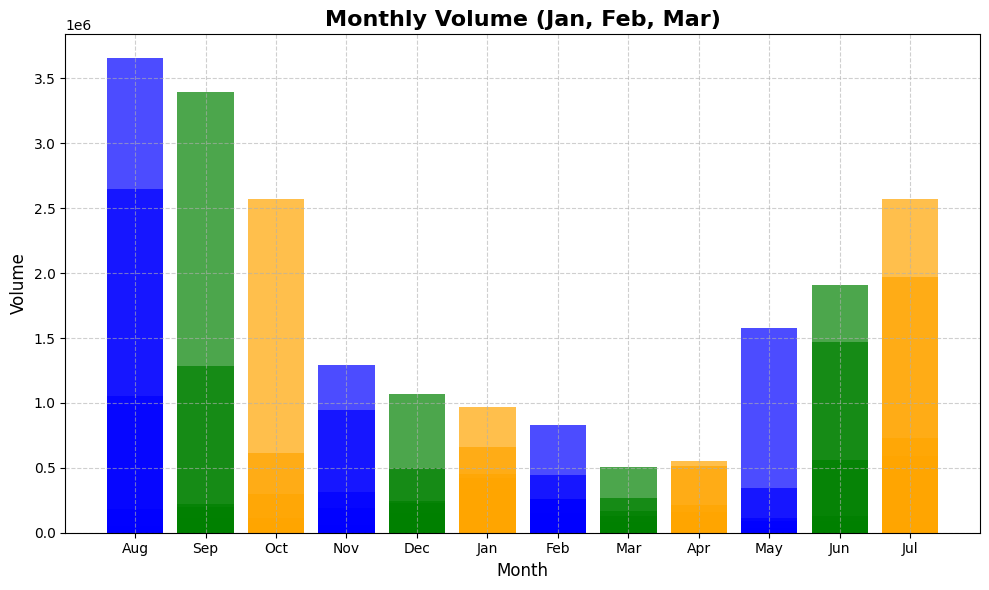

In [64]:
# Resample for monthly volume
monthly_volume = df['Qty.'].resample('M').sum()  # Monthly volume

# Plot the monthly volume
plt.figure(figsize=(10, 6))
plt.bar(monthly_volume.index.strftime('%b'), monthly_volume, color=['blue', 'green', 'orange'], alpha=0.7)
plt.title('Monthly Volume (Jan, Feb, Mar)', fontsize=16, fontweight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Volume', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# # Print the monthly volume
# print("Monthly Volume:")
# print(monthly_volume)

C:\Users\baral\AppData\Local\Temp\ipykernel_3776\2903239807.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_volume = df['Qty.'].resample('M').sum()  # Monthly volume


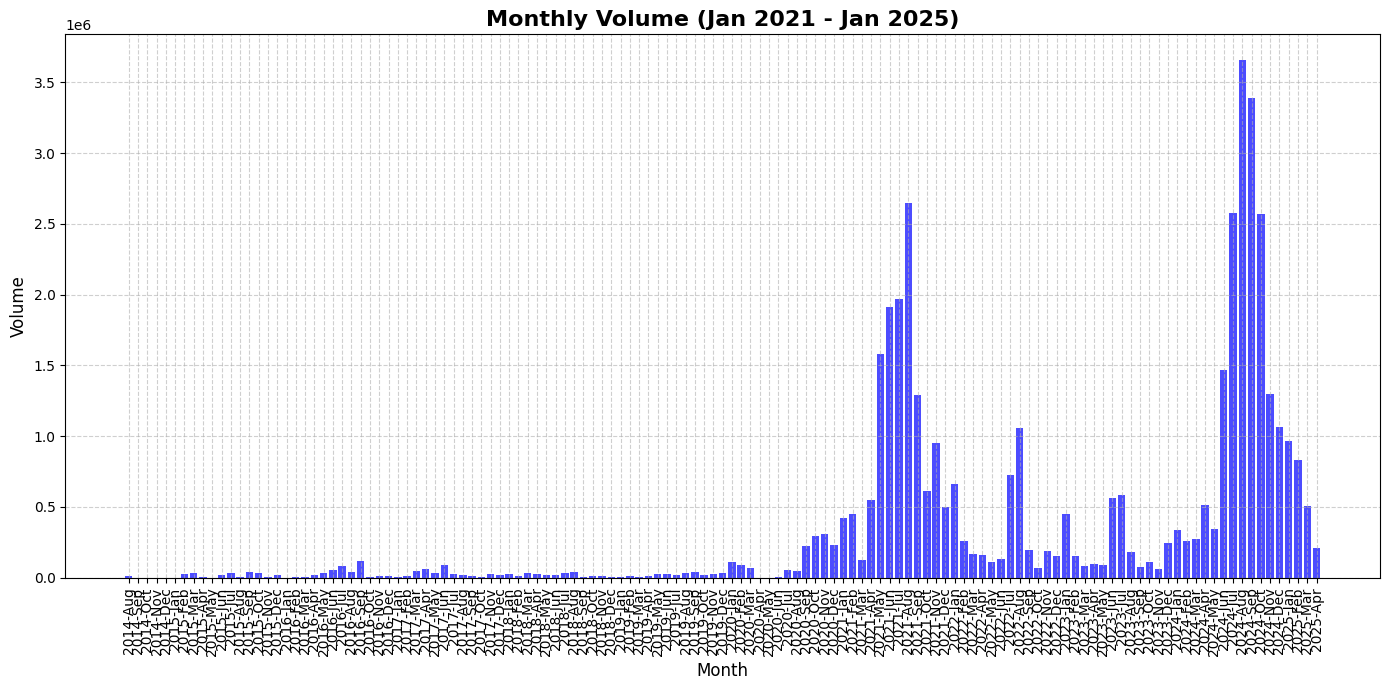

Monthly Volume:
Date
2014-08-31      10804.0
2014-09-30          0.0
2014-10-31          0.0
2014-11-30          0.0
2014-12-31        559.0
                ...    
2024-12-31    1065610.0
2025-01-31     968363.0
2025-02-28     830106.0
2025-03-31     504264.0
2025-04-30     213524.0
Freq: ME, Name: Qty., Length: 129, dtype: float64


In [65]:
monthly_volume = df['Qty.'].resample('M').sum()  # Monthly volume

# Plot the monthly volume
plt.figure(figsize=(14, 7))
plt.bar(monthly_volume.index.strftime('%Y-%b'), monthly_volume, color='blue', alpha=0.7)
plt.title('Monthly Volume (Jan 2021 - Jan 2025)', fontsize=16, fontweight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Volume', fontsize=12)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Print the monthly volume
print("Monthly Volume:")
print(monthly_volume)

### Buy Signal with Dates

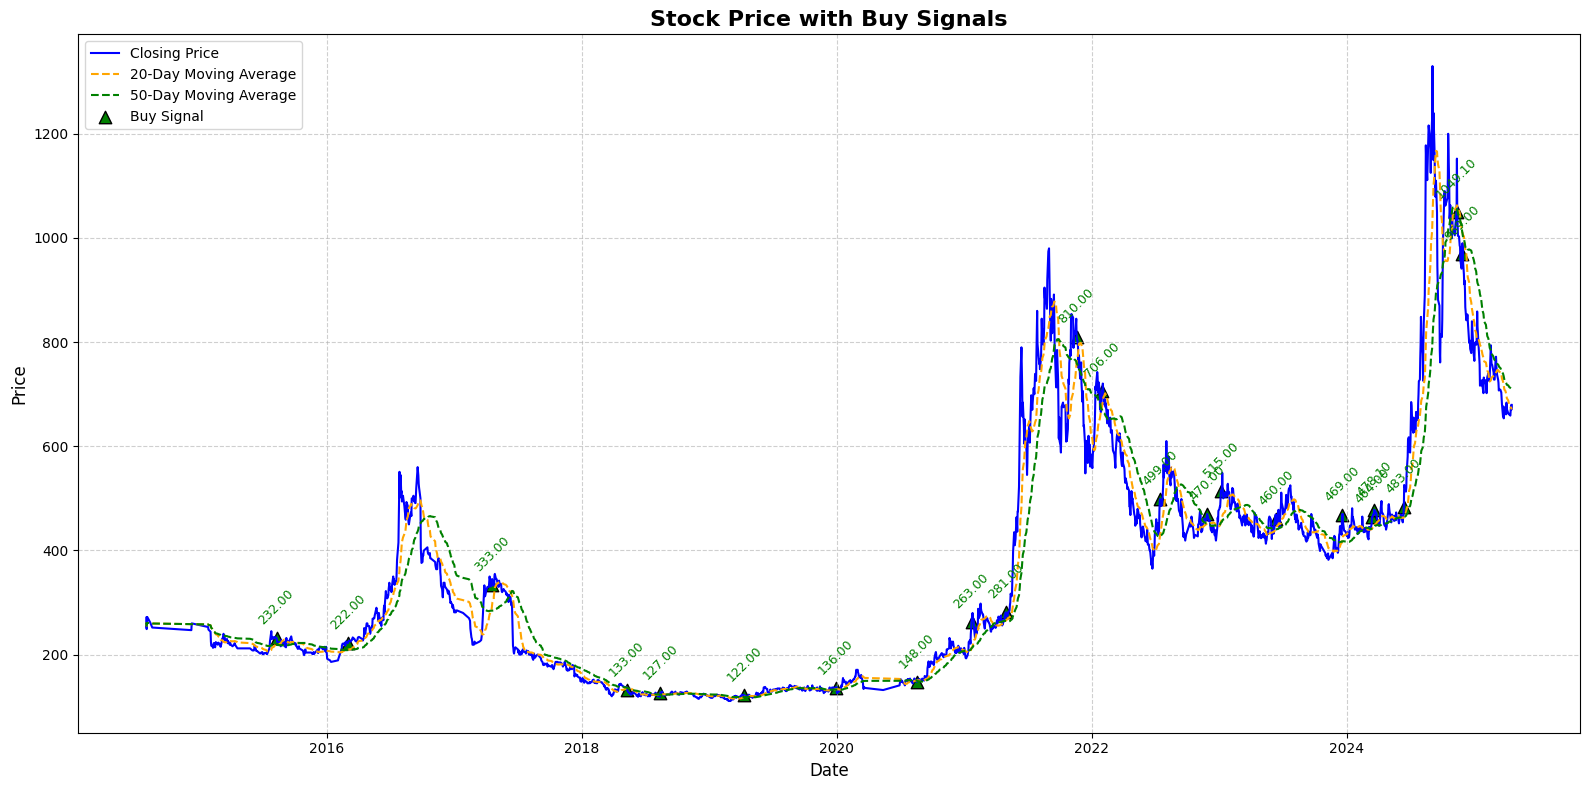

This is data: (2081, 23)
This is signals: (2081, 4)
Buy Signals on the following dates:
2015-08-11
2016-03-02
2017-04-18
2018-05-10
2018-08-14
2019-04-11
2019-12-29
2020-08-17
2021-01-21
2021-04-29
2021-11-18
2022-01-30
2022-07-15
2022-11-27
2023-01-05
2023-06-12
2023-12-18
2024-03-14
2024-03-19
2024-06-12
2024-11-10
2024-11-26


In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import argrelextrema

# Function to calculate moving averages
def calculate_moving_averages(data, short_window=20, long_window=50):
    data['Short_MA'] = data['LTP'].rolling(window=short_window, min_periods=1).mean()
    data['Long_MA'] = data['LTP'].rolling(window=long_window, min_periods=1).mean()
    return data

# Function to identify support and resistance levels
def find_support_resistance(data, order=5):
    local_min = argrelextrema(data['LTP'].values, np.less, order=order)[0]
    support_levels = data.iloc[local_min]['LTP']
    
    local_max = argrelextrema(data['LTP'].values, np.greater, order=order)[0]
    resistance_levels = data.iloc[local_max]['LTP']
    
    return support_levels, resistance_levels

# Function to generate buy signals
def generate_buy_signals(data):
    signals = pd.DataFrame(index=data.index)
    signals['Price'] = data['LTP']
    signals['Short_MA'] = data['Short_MA']
    signals['Long_MA'] = data['Long_MA']
    
    # Buy signal when short-term MA crosses above long-term MA
    signals['Buy_Signal'] = np.where(signals['Short_MA'] > signals['Long_MA'], 1, 0)
    
    # Ensure the signal is new (not carried over from previous days)
    signals['Buy_Signal'] = signals['Buy_Signal'].diff()
    signals['Buy_Signal'] = np.where(signals['Buy_Signal'] == 1, 1, 0)
    
    return signals

# Function to plot the data with buy signals
def plot_signals(data, signals):
    plt.figure(figsize=(16, 8))  # Increase figure size
    plt.plot(data['LTP'], label='Closing Price', color='blue', linewidth=1.5)
    plt.plot(data['Short_MA'], label='20-Day Moving Average', color='orange', linestyle='--', linewidth=1.5)
    plt.plot(data['Long_MA'], label='50-Day Moving Average', color='green', linestyle='--', linewidth=1.5)
    
    # Plot buy signals
    buy_signals = signals[signals['Buy_Signal'] == 1]
    if not buy_signals.empty:  # Check if there are any buy signals
        plt.scatter(
            buy_signals.index,
            buy_signals['Price'],  # Use 'Price' from signals DataFrame
            marker='^', color='green', label='Buy Signal', s=80, edgecolor='black', linewidth=1
        )
        
        # Annotate buy signals with price values
        for date, price in zip(buy_signals.index, buy_signals['Price']):
            plt.annotate(
                f'{price:.2f}', 
                (date, price), 
                textcoords="offset points", 
                xytext=(0, 10), 
                ha='center', 
                color='green', 
                fontsize=9, 
                rotation=45
            )
    
    # Add title and labels
    plt.title('Stock Price with Buy Signals', fontsize=16, fontweight='bold')
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Price', fontsize=12)
    
    # Add gridlines
    plt.grid(True, linestyle='--', alpha=0.6)
    
    # Add legend
    plt.legend(loc='upper left', fontsize=10)
    
    # Adjust layout
    plt.tight_layout()
    plt.show()

# Main function to execute the analysis
def main(data):
    # Calculate moving averages
    data = calculate_moving_averages(data)
    
    # Generate buy signals
    signals = generate_buy_signals(data)
    
    # Plot the data with buy signals
    plot_signals(data, signals)
    print("This is data:", data.shape)
    print("This is signals:", signals.shape)
    
    # Print buy signal dates
    buy_dates = signals[signals['Buy_Signal'] == 1].index
    print("Buy Signals on the following dates:")
    for date in buy_dates:
        print(date.strftime('%Y-%m-%d'))

# Example usage
if __name__ == "__main__":
    # Example data
    # data = pd.DataFrame({
    #     'Date': pd.date_range(start='2023-01-01', periods=100, freq='D'),
    #     'LTP': np.random.rand(100) * 100 + 100  # Random prices between 100 and 200
    # })
    # data.set_index('Date', inplace=True)
    
    # Run the main function
    main(data)

### Moving Average of 50 days and 200 days

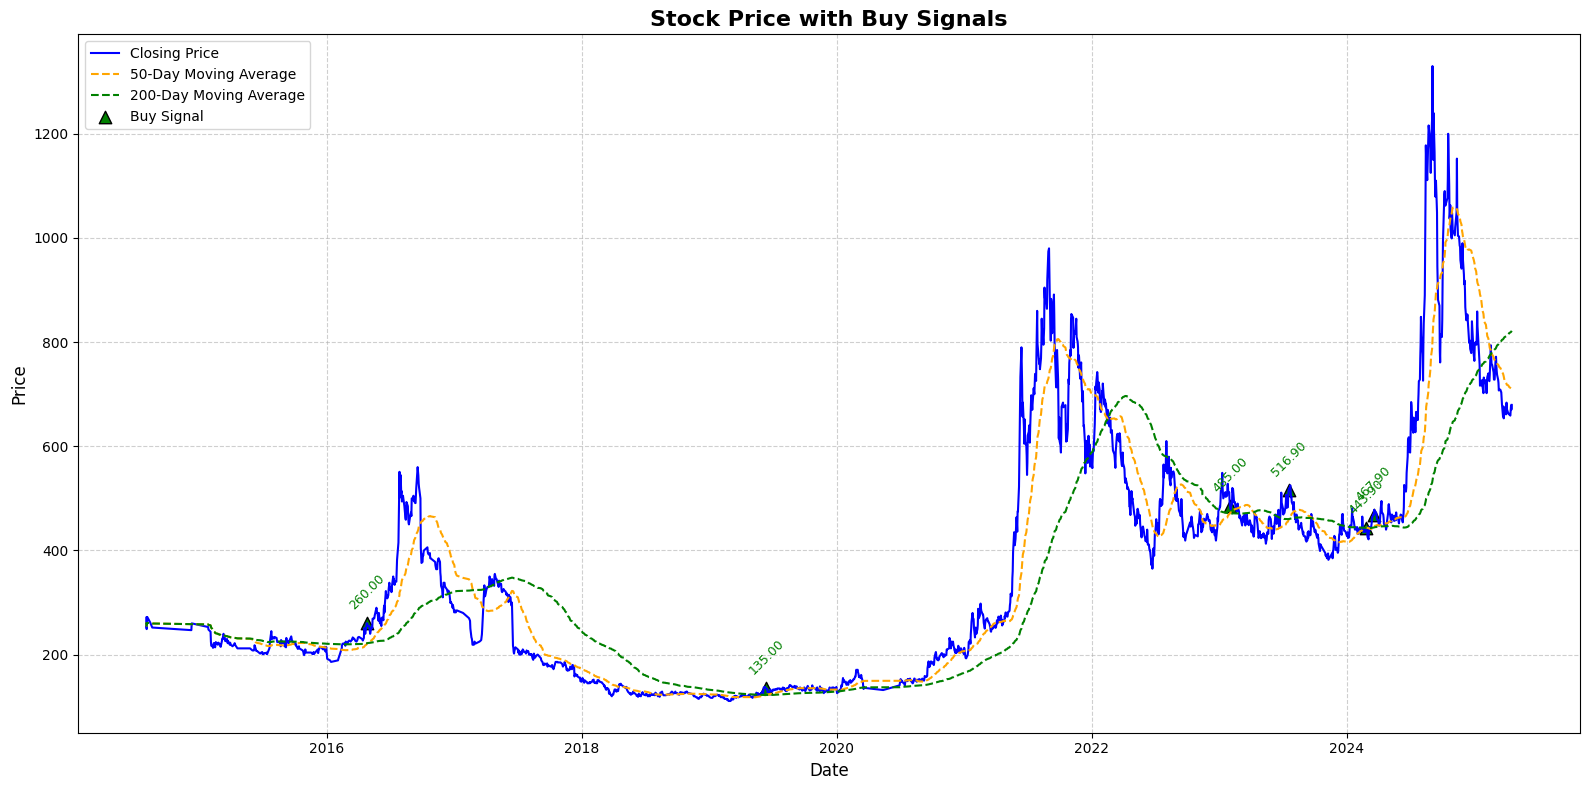

Buy Signals on the following dates:
2016-04-27
2019-06-13
2023-01-31
2023-07-20
2024-02-25
2024-03-18


In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import argrelextrema

# # Function to load and prepare the data
# def load_data(file_path):
#     data = pd.read_csv(file_path)
#     data['Date'] = pd.to_datetime(data['Date'])
#     data.set_index('Date', inplace=True)
#     data.sort_index(inplace=True)
#     return data

# Function to calculate moving averages
def calculate_moving_averages(data, short_window=50, long_window=200):
    data['Short_MA'] = data['LTP'].rolling(window=short_window, min_periods=1).mean()
    data['Long_MA'] = data['LTP'].rolling(window=long_window, min_periods=1).mean()
    return data

# Function to identify support and resistance levels
def find_support_resistance(data, order=5):
    local_min = argrelextrema(data['LTP'].values, np.less, order=order)[0]
    support_levels = data.iloc[local_min]['LTP']
    
    local_max = argrelextrema(data['LTP'].values, np.greater, order=order)[0]
    resistance_levels = data.iloc[local_max]['LTP']
    
    return support_levels, resistance_levels

# Function to generate buy signals
def generate_buy_signals(data):
    signals = pd.DataFrame(index=data.index)
    signals['Price'] = data['LTP']
    signals['Short_MA'] = data['Short_MA']
    signals['Long_MA'] = data['Long_MA']
    
    # Buy signal when short-term MA crosses above long-term MA
    signals['Buy_Signal'] = np.where(signals['Short_MA'] > signals['Long_MA'], 1, 0)
    
    # Ensure the signal is new (not carried over from previous days)
    signals['Buy_Signal'] = signals['Buy_Signal'].diff()
    signals['Buy_Signal'] = np.where(signals['Buy_Signal'] == 1, 1, 0)
    
    return signals

# Function to plot the data with buy signals
def plot_signals(data, signals):
    plt.figure(figsize=(16, 8))  # Increase figure size
    plt.plot(data['LTP'], label='Closing Price', color='blue', linewidth=1.5)
    plt.plot(data['Short_MA'], label='50-Day Moving Average', color='orange', linestyle='--', linewidth=1.5)
    plt.plot(data['Long_MA'], label='200-Day Moving Average', color='green', linestyle='--', linewidth=1.5)
    
    # Plot buy signals
    buy_signals = signals[signals['Buy_Signal'] == 1]
    plt.scatter(
        buy_signals.index,
        data.loc[buy_signals.index, 'LTP'],
        marker='^', color='green', label='Buy Signal', s=80, edgecolor='black', linewidth=1
    )
    
    # Annotate buy signals with price values
    for date, price in zip(buy_signals.index, data.loc[buy_signals.index, 'LTP']):
        plt.annotate(
            f'{price:.2f}', 
            (date, price), 
            textcoords="offset points", 
            xytext=(0, 10), 
            ha='center', 
            color='green', 
            fontsize=9, 
            rotation=45
        )
    
    # Add title and labels
    plt.title('Stock Price with Buy Signals', fontsize=16, fontweight='bold')
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Price', fontsize=12)
    
    # Add gridlines
    plt.grid(True, linestyle='--', alpha=0.6)
    
    # Add legend
    plt.legend(loc='upper left', fontsize=10)
    
    # Adjust layout
    plt.tight_layout()
    plt.show()

# Main function to execute the analysis
def main(data):
    # Calculate moving averages
    data = calculate_moving_averages(data)
    
    # Generate buy signals
    signals = generate_buy_signals(data)
    
    # Plot the data with buy signals
    plot_signals(data, signals)
    
    # Print buy signal dates
    buy_dates = signals[signals['Buy_Signal'] == 1].index
    print("Buy Signals on the following dates:")
    for date in buy_dates:
        print(date.strftime('%Y-%m-%d'))

# Example usage
if __name__ == "__main__":
    # Load your data here
    # file_path = 'stock_data.csv'  # Replace with your file path
    # data = load_data(file_path)
    
    # Run the main function
    main(data)

### Buy Signal using exponentail moving average

ValueError: x and y must be the same size

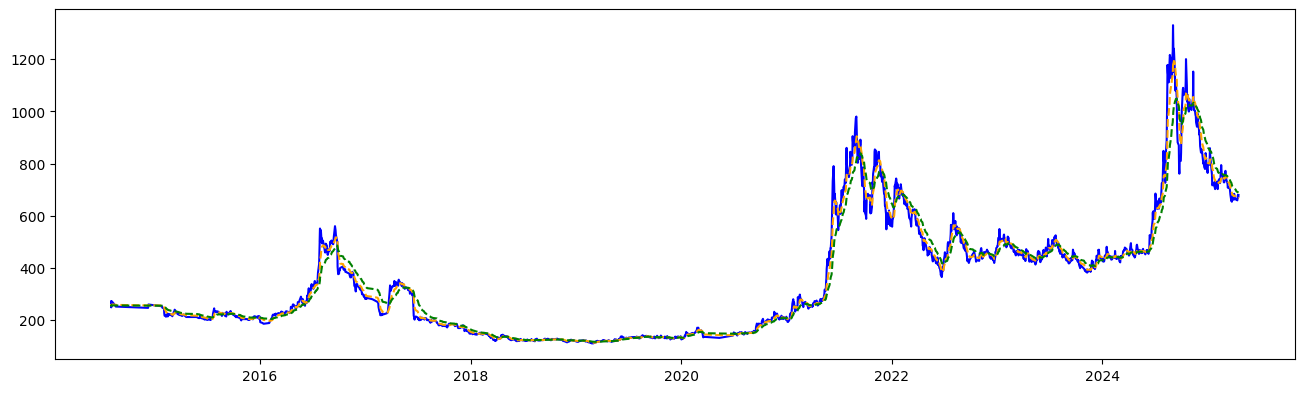

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import argrelextrema

# Function to calculate EMAs and volume SMA
def calculate_emas_and_volume(data, short_span=10, long_span=30, volume_window=20):
    data['10_EMA'] = data['LTP'].ewm(span=short_span, adjust=False).mean()
    data['30_EMA'] = data['LTP'].ewm(span=long_span, adjust=False).mean()
    data['Volume_SMA'] = data['Qty.'].rolling(window=volume_window, min_periods=1).mean()
    return data

# Function to generate buy signals with volume confirmation
def generate_buy_signals(data):
    signals = pd.DataFrame(index=data.index)
    signals['Price'] = data['LTP']
    signals['10_EMA'] = data['10_EMA']
    signals['30_EMA'] = data['30_EMA']
    signals['Volume_SMA'] = data['Volume_SMA']
    
    # Buy signal when 10 EMA crosses above 30 EMA and volume is above its SMA
    signals['Buy_Signal'] = np.where(
        (signals['10_EMA'] > signals['30_EMA']) & 
        (signals['10_EMA'].shift(1) <= signals['30_EMA'].shift(1)) & 
        (data['Qty.'] > signals['Volume_SMA']), 
        1, 0
    )
    
    return signals

# Function to plot the data with buy signals and volume
def plot_signals(data, signals):
    plt.figure(figsize=(16, 10))  # Increase figure size
    
    # Plot price and EMAs
    plt.subplot(2, 1, 1)  # First subplot for price and EMAs
    plt.plot(data['LTP'], label='Closing Price', color='blue', linewidth=1.5)
    plt.plot(data['10_EMA'], label='10-Day EMA', color='orange', linestyle='--', linewidth=1.5)
    plt.plot(data['30_EMA'], label='30-Day EMA', color='green', linestyle='--', linewidth=1.5)
    
    # Plot buy signals
    buy_signals = signals[signals['Buy_Signal'] == 1]
    plt.scatter(
        buy_signals.index,
        data.loc[buy_signals.index, 'LTP'],
        marker='^', color='green', label='Buy Signal', s=80, edgecolor='black', linewidth=1
    )
    
    # Annotate buy signals with price values
    for date, price in zip(buy_signals.index, data.loc[buy_signals.index, 'LTP']):
        plt.annotate(
            f'{price:.2f}', 
            (date, price), 
            textcoords="offset points", 
            xytext=(0, 10), 
            ha='center', 
            color='green', 
            fontsize=9, 
            rotation=45
        )
    
    # Add title and labels
    plt.title('Stock Price with Buy Signals (10 EMA & 30 EMA)', fontsize=16, fontweight='bold')
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Price', fontsize=12)
    plt.legend(loc='upper left', fontsize=10)
    plt.grid(True, linestyle='--', alpha=0.6)
    
    # Plot volume and volume SMA
    plt.subplot(2, 1, 2)  # Second subplot for volume
    plt.bar(data.index, data['Qty.'], color='blue', label='Volume', alpha=0.6)
    plt.plot(data.index, data['Volume_SMA'], color='red', label='20-Day Volume SMA', linewidth=1.5)
    
    # Add title and labels
    plt.title('Volume with 20-Day SMA', fontsize=16, fontweight='bold')
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Volume', fontsize=12)
    plt.legend(loc='upper left', fontsize=10)
    plt.grid(True, linestyle='--', alpha=0.6)
    
    # Adjust layout
    plt.tight_layout()
    plt.show()

# Main function to execute the analysis
def main(data):
    # Calculate EMAs and volume SMA
    data = calculate_emas_and_volume(data)
    
    # Generate buy signals
    signals = generate_buy_signals(data)
    
    # Plot the data with buy signals
    plot_signals(data, signals)
    
    # Print buy signal dates
    buy_dates = signals[signals['Buy_Signal'] == 1].index
    print("Buy Signals on the following dates:")
    for date in buy_dates:
        print(date.strftime('%Y-%m-%d'))

# Example usage
if __name__ == "__main__":
    # Load your data here
    # file_path = 'stock_data.csv'  # Replace with your file path
    # data = load_data(file_path)
    
    # Run the main function
    main(data)

Filtered data for period 1m:
            Close  %change   High    Low   Open     Qty.    Turnover  Month  \
Date                                                                          
2025-01-12  570.6    -1.62  580.0  570.6  575.5  12330.0   7072135.0      1   
2025-01-09  580.0    -1.69  590.0  580.0  590.0  26711.0  15575551.2      1   
2025-01-08  590.0    -1.96  613.8  590.0  613.8  23748.0  14108646.4      1   
2025-01-07  601.8     3.38  601.8  580.0  590.0  25393.0  14960543.6      1   
2025-01-06  582.1     1.59  585.0  573.0  573.0  15273.0   8870576.4      1   
2025-01-05  573.0     0.24  577.0  569.0  570.0  13500.0   7759027.4      1   
2025-01-02  571.6     0.60  576.0  567.1  568.0  10918.0   6251053.6      1   
2025-01-01  568.2     0.57  576.0  564.6  576.0   6101.0   3478089.4      1   
2024-12-31  565.0    -1.07  573.2  562.0  562.1  11487.0   6486121.2     12   
2024-12-29  571.1    -1.38  582.0  570.0  572.0  10235.0   5884972.5     12   
2024-12-26  579.1    -1

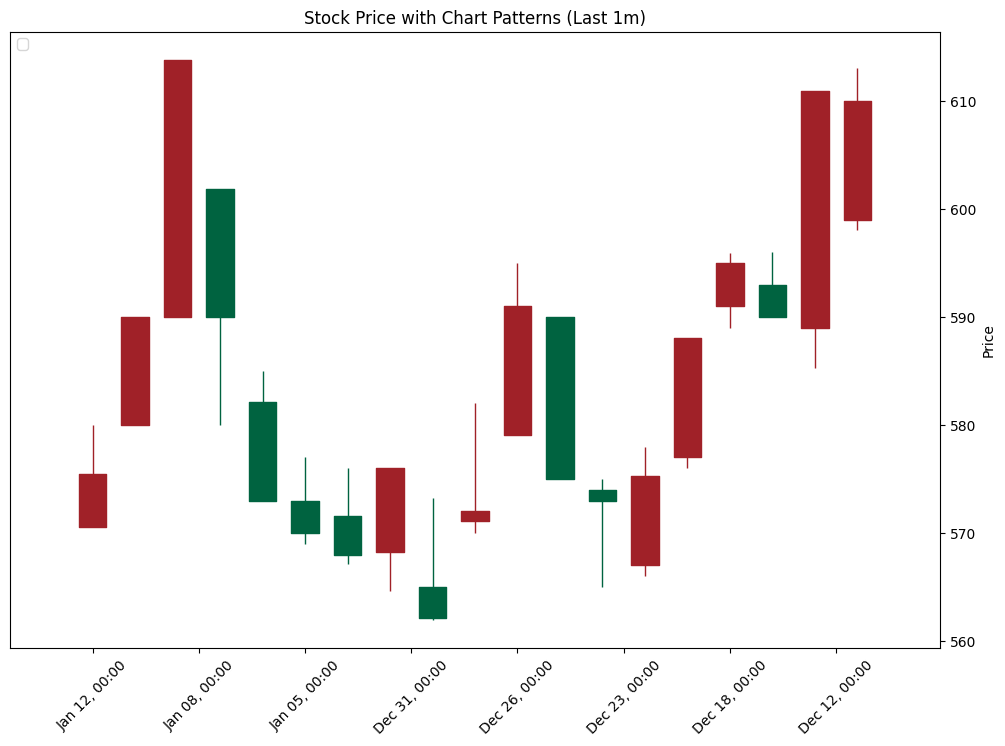

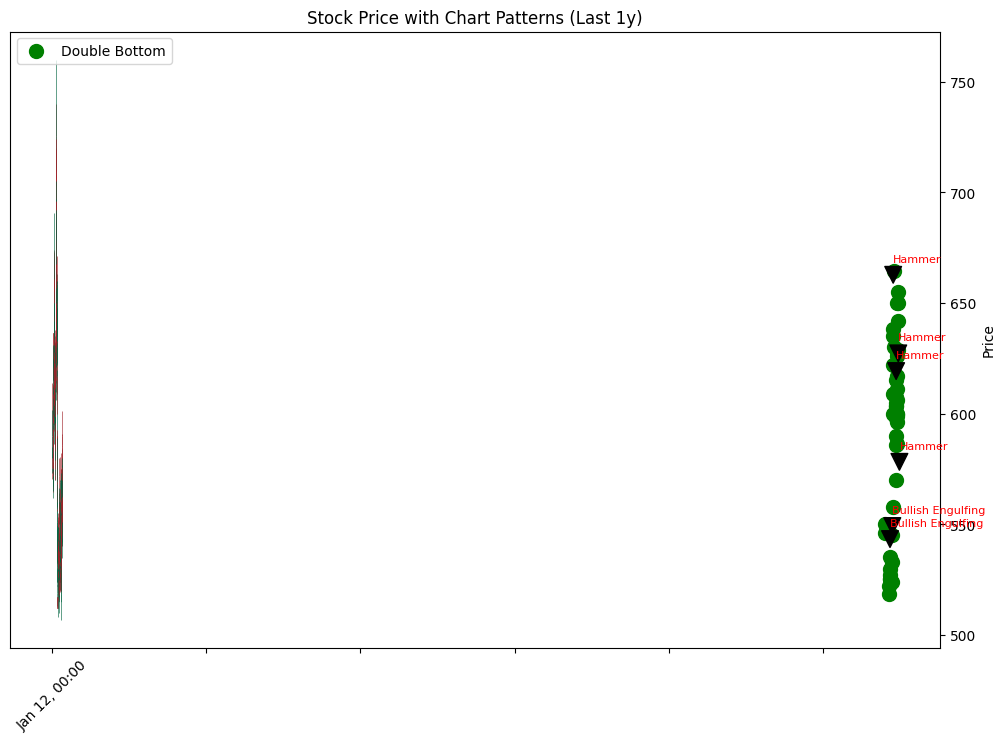

In [ ]:
import pandas as pd
import numpy as np
import mplfinance as mpf
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta

# Load the data
# df = pd.read_csv('stock_data.csv')

# # Convert 'Date' to datetime and set as index
# df['Date'] = pd.to_datetime(df['Date'])
# df.set_index('Date', inplace=True)

# Rename 'LTP' to 'Close'
df.rename(columns={'LTP': 'Close'}, inplace=True)

# Function to filter data based on user input
def filter_data_by_period(df, period):
    today = df.index.max()  # Use the latest date in the dataset
    if period.endswith('d'):  # Days
        days = int(period[:-1])
        start_date = today - timedelta(days=days)
    elif period.endswith('m'):  # Months
        months = int(period[:-1])
        start_date = today - relativedelta(months=months)
    elif period.endswith('y'):  # Years
        years = int(period[:-1])
        start_date = today - relativedelta(years=years)
    else:
        raise ValueError("Invalid period format. Use 'd' for days, 'm' for months, or 'y' for years.")
    return df[df.index >= start_date]

# Take user input for the period
period_input = "1m, 1y".strip().lower()
periods = [p.strip() for p in period_input.split(',')]

# Filter data based on user input for each period
filtered_data = {}
for period in periods:
    df_filtered = filter_data_by_period(df, period)
    filtered_data[period] = df_filtered
    print(f"Filtered data for period {period}:")
    print(df_filtered)

# Function to identify Double Bottom patterns
def identify_double_bottom(df, window=30):
    double_bottoms = []
    for i in range(window, len(df)):
        current_low = df['Low'].iloc[i]
        previous_lows = df['Low'].iloc[i-window:i]
        # Find the two lowest points in the window
        lowest_points = previous_lows.nsmallest(2)
        if len(lowest_points) == 2 and lowest_points.iloc[0] < lowest_points.iloc[1]:
            # Check if the two lowest points are at the ends
            if (previous_lows.index.get_loc(lowest_points.index[0]) < previous_lows.index.get_loc(lowest_points.index[1])):
                double_bottoms.append(i)
    return double_bottoms

# Function to identify Cup and Handle patterns (simplified)
def identify_cup_and_handle(df, window=60):
    cup_and_handle = []
    # Placeholder for a more complex implementation
    return cup_and_handle

# Function to detect Candlestick patterns
def detect_candlestick_patterns(df):
    patterns = []
    for i in range(1, len(df)):
        open_price = df['Open'].iloc[i]
        close_price = df['Close'].iloc[i]
        high_price = df['High'].iloc[i]
        low_price = df['Low'].iloc[i]
        
        # Bullish Engulfing
        if df['Close'].iloc[i-1] < df['Open'].iloc[i-1] and close_price > open_price and close_price > df['Open'].iloc[i-1] and open_price < df['Close'].iloc[i-1]:
            patterns.append(('Bullish Engulfing', df.index[i]))
        # Hammer
        if (close_price > open_price) and (close_price >= high_price - 0.1*(high_price - low_price)) and (open_price > low_price + 0.5*(high_price - low_price)):
            patterns.append(('Hammer', df.index[i]))
        # Add more patterns as needed
    return patterns

# Plot the data with patterns for each period
for period, df_filtered in filtered_data.items():
    # Identify patterns
    double_bottom_indices = identify_double_bottom(df_filtered)
    cup_handle_indices = identify_cup_and_handle(df_filtered)
    candlestick_patterns = detect_candlestick_patterns(df_filtered)

    # Plot the data with patterns
    fig, ax = plt.subplots(figsize=(12, 8))

    # Plot candlestick chart without volume
    mpf.plot(df_filtered, type='candle', ax=ax, style='charles', volume=False)

    # Mark Double Bottoms
    for idx in double_bottom_indices:
        ax.scatter(df_filtered.index[idx], df_filtered['Low'].iloc[idx], color='green', marker='o', s=100, label='Double Bottom')

    # Mark Cup and Handle patterns
    for idx in cup_handle_indices:
        ax.scatter(df_filtered.index[idx], df_filtered['Close'].iloc[idx], color='blue', marker='o', s=100, label='Cup and Handle')

    # Annotate Candlestick patterns
    for pattern, date in candlestick_patterns:
        ax.annotate(
            pattern,
            (date, df_filtered['Close'][date]),
            xytext=(date, df_filtered['Close'][date] + 10),
            arrowprops=dict(facecolor='black', shrink=0.05),
            fontsize=8,
            color='red'
        )

    # Add legend
    handles, labels = ax.get_legend_handles_labels()
    by_label = dict(zip(labels, handles))  # Remove duplicate labels
    ax.legend(by_label.values(), by_label.keys(), loc='upper left')

    plt.title(f'Stock Price with Chart Patterns (Last {period})')
    plt.show()